In [31]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
#Loading dataset
data = pd.read_csv('/content/drive/MyDrive/Data Analytics RE/Sample 1_CSV_S&P1500_Raw Dataset_Data Analytics in Business Assignment_2021 (2).csv')

In [33]:
#Displaying rows
print(data.head())

           Ticker                           Name  Year   ISIN Number  \
0  VRSK UW Equity           Verisk Analytics Inc  2016  US92345Y1064   
1  EVTC UN Equity                    EVERTEC Inc  2016  PR30040P1032   
2   PFG UW Equity  Principal Financial Group Inc  2016  US74251V1026   
3  NXPI UW Equity          NXP Semiconductors NV  2016  NL0009538784   
4  CELH UR Equity           Celsius Holdings Inc  2016  US15118V2079   

   SIC Code  GICS Industry Country or Territory of Domicile  \
0    7374.0         202020                               US   
1    7374.0         451020                               PR   
2    6321.0         403010                               US   
3    3674.0         453010                               NL   
4    2086.0         302010                               US   

   Number of Employees  Total Assets  R&D Expense  R&D Expense Adjusted  \
0               6148.0     4631.2000         27.4                  27.4   
1               1650.0      885.6620  

In [34]:
#Displaying basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4518 entries, 0 to 4517
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ticker                            4518 non-null   object 
 1   Name                              4518 non-null   object 
 2   Year                              4518 non-null   int64  
 3   ISIN Number                       4518 non-null   object 
 4   SIC Code                          4437 non-null   float64
 5   GICS Industry                     4518 non-null   int64  
 6   Country or Territory of Domicile  4518 non-null   object 
 7   Number of Employees               4315 non-null   float64
 8   Total Assets                      4452 non-null   float64
 9   R&D Expense                       3503 non-null   float64
 10  R&D Expense Adjusted              3211 non-null   float64
 11  Operating Expenses R&D            3209 non-null   float64
 12  Cash a

In [35]:
#Converting relevant columns to categorical datatype
categorical_columns = ['Ticker', 'Name', 'ISIN Number', 'Country or Territory of Domicile', 'GICS Industry']
for col in categorical_columns:
    data[col] = data[col].astype('category')
print(data.dtypes)

Ticker                              category
Name                                category
Year                                   int64
ISIN Number                         category
SIC Code                             float64
GICS Industry                       category
Country or Territory of Domicile    category
Number of Employees                  float64
Total Assets                         float64
R&D Expense                          float64
R&D Expense Adjusted                 float64
Operating Expenses R&D               float64
Cash and Cash Equivalents            float64
Environmental Disclosure Score       float64
Social Disclosure Score              float64
Governance Disclosure Score          float64
Tobin's Q Ratio                      float64
Return on Assets                     float64
Return on Common Equity              float64
Gross Margin                         float64
dtype: object


In [36]:
#Checking for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                                  Missing Values  Percentage
Ticker                                         0    0.000000
Name                                           0    0.000000
Year                                           0    0.000000
ISIN Number                                    0    0.000000
SIC Code                                      81    1.792829
GICS Industry                                  0    0.000000
Country or Territory of Domicile               0    0.000000
Number of Employees                          203    4.493139
Total Assets                                  66    1.460823
R&D Expense                                 1015   22.465693
R&D Expense Adjusted                        1307   28.928730
Operating Expenses R&D                      1309   28.972997
Cash and Cash Equivalents                     66    1.460823
Environmental Disclosure Score              1339   29.637008
Social Disclosure Score                      350    7.746791
Governance Disclosure Sc

In [37]:
#Imputing missing numerical values
#1. SIC Code:
data['SIC Code'] = data['SIC Code'].fillna(data['SIC Code'].mode()[0])
#2. Number of Employees:
data['Number of Employees'] = data['Number of Employees'].fillna(data['Number of Employees'].median())
#3. Total Assets:
data['Total Assets'] = data['Total Assets'].fillna(data['Total Assets'].median())
#4. R&D Expense:
knn_imputer = KNNImputer(n_neighbors=5)
data[['R&D Expense']] = knn_imputer.fit_transform(data[['R&D Expense']])
#5. R&D Expense Adjusted:
data[['R&D Expense Adjusted']] = knn_imputer.fit_transform(data[['R&D Expense Adjusted']])
#6. Operating Expenses R&D:
data[['Operating Expenses R&D']] = knn_imputer.fit_transform(data[['Operating Expenses R&D']])
#7. Cash and Cash Equivalents:
data['Cash and Cash Equivalents'] = data['Cash and Cash Equivalents'].fillna(data['Cash and Cash Equivalents'].median())
#8. Environmental Disclosure Score:
iter_imputer = IterativeImputer()
data[['Environmental Disclosure Score']] = iter_imputer.fit_transform(data[['Environmental Disclosure Score']])
#9. Social Disclosure Score:
data[['Social Disclosure Score']] = iter_imputer.fit_transform(data[['Social Disclosure Score']])
#10.  Governance Disclosure Score:
data[['Governance Disclosure Score']] = iter_imputer.fit_transform(data[['Governance Disclosure Score']])
#11. Tobin's Q Ratio:
data['Tobin\'s Q Ratio'] = data['Tobin\'s Q Ratio'].fillna(data['Tobin\'s Q Ratio'].median())
#12. Return on Assets:
data['Return on Assets'] = data['Return on Assets'].fillna(data['Return on Assets'].mean())
#13. Return on Common Equity:
data['Return on Common Equity'] = data['Return on Common Equity'].fillna(data['Return on Common Equity'].mean())
#14. Gross Margin:
data[['Gross Margin']] = knn_imputer.fit_transform(data[['Gross Margin']])


In [38]:
#Cross-Checking for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                                  Missing Values  Percentage
Ticker                                         0         0.0
Name                                           0         0.0
Year                                           0         0.0
ISIN Number                                    0         0.0
SIC Code                                       0         0.0
GICS Industry                                  0         0.0
Country or Territory of Domicile               0         0.0
Number of Employees                            0         0.0
Total Assets                                   0         0.0
R&D Expense                                    0         0.0
R&D Expense Adjusted                           0         0.0
Operating Expenses R&D                         0         0.0
Cash and Cash Equivalents                      0         0.0
Environmental Disclosure Score                 0         0.0
Social Disclosure Score                        0         0.0
Governance Disclosure Sc

In [39]:
data.head()

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
0,VRSK UW Equity,Verisk Analytics Inc,2016,US92345Y1064,7374.0,202020,US,6148.0,4631.2000,27.400000,27.400000,27.400000,135.1000,22.480600,38.5965,60.7143,3.6378,11.563900,43.721300,64.194100
1,EVTC UN Equity,EVERTEC Inc,2016,PR30040P1032,7374.0,451020,PR,1650.0,885.6620,0.000000,0.000000,0.000000,51.9200,4.651200,24.5614,51.7857,2.3375,8.547400,73.955300,54.863700
2,PFG UW Equity,Principal Financial Group Inc,2016,US74251V1026,6321.0,403010,US,14895.0,228014.3000,288.511278,277.162533,283.099503,2719.6000,25.892900,28.3333,60.7143,1.0282,0.589500,13.475700,40.775747
3,NXPI UW Equity,NXP Semiconductors NV,2016,NL0009538784,3674.0,453010,NL,40400.0,24898.0000,1560.000000,1520.000000,1560.000000,1894.0000,40.310100,28.0702,26.7857,1.8811,0.780500,1.781700,42.840600
4,CELH UR Equity,Celsius Holdings Inc,2016,US15118V2079,2086.0,302010,US,39.0,17.7171,0.000000,0.000000,0.000000,11.7471,19.249815,3.5088,37.5000,6.2765,4.926009,14.295415,42.747900


In [40]:
#Saving preprocessed file
output_file_path = '/content/drive/MyDrive/Data Analytics RE/Preprocessed.csv'
data.to_csv(output_file_path, index=False)

In [41]:
#Summary statistics for numerical columns
print(data.describe())

              Year     SIC Code  Number of Employees  Total Assets  \
count  4518.000000  4518.000000         4.518000e+03  4.518000e+03   
mean   2017.000000  4912.460159         2.133992e+04  2.546104e+04   
std       0.816587  1844.589781         7.565609e+04  1.275207e+05   
min    2016.000000   700.000000         2.000000e+00  4.091000e+00   
25%    2016.000000  3559.000000         1.575250e+03  1.303778e+03   
50%    2017.000000  4931.000000         5.125000e+03  3.960623e+03   
75%    2018.000000  6331.000000         1.500000e+04  1.267225e+04   
max    2018.000000  8744.000000         2.300000e+06  2.622532e+06   

        R&D Expense  R&D Expense Adjusted  Operating Expenses R&D  \
count   4518.000000           4518.000000             4518.000000   
mean     288.511278            277.162533              283.099503   
std     1275.847794           1220.550565             1241.313035   
min        0.000000              0.000000                0.000000   
25%        0.000000     

In [42]:
#Function to identify outliers based on IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#List of numerical variables to investigate
numerical_vars = [
    'Total Assets', 'Number of Employees', 'R&D Expense',
    'Environmental Disclosure Score', 'Social Disclosure Score',
    'Governance Disclosure Score', 'Return on Assets',
    'Return on Common Equity', 'Gross Margin'
]

#Identifying and listing outliers for each numerical variable
outliers_dict = {}
for var in numerical_vars:
    outliers_dict[var] = identify_outliers(data, var)
outliers_count = {var: len(outliers) for var, outliers in outliers_dict.items()}
print(outliers_count)

for var, outliers in outliers_dict.items():
    print(f"\nOutliers for {var}:\n", outliers)

{'Total Assets': 593, 'Number of Employees': 599, 'R&D Expense': 236, 'Environmental Disclosure Score': 150, 'Social Disclosure Score': 247, 'Governance Disclosure Score': 579, 'Return on Assets': 329, 'Return on Common Equity': 537, 'Gross Margin': 246}

Outliers for Total Assets:
               Ticker                           Name  Year   ISIN Number  \
2      PFG UW Equity  Principal Financial Group Inc  2016  US74251V1026   
5      AXP UN Equity            American Express Co  2016  US0258161092   
6       VZ UN Equity     Verizon Communications Inc  2016  US92343V1044   
7       BA UN Equity                  Boeing Co/The  2016  US0970231058   
11     CAT UN Equity                Caterpillar Inc  2016  US1491231015   
...              ...                            ...   ...           ...   
4437  TSLA UW Equity                      Tesla Inc  2018  US88160R1014   
4443   DXC UN Equity              DXC Technology Co  2018  US23355L1061   
4491  ORCL UN Equity                    O

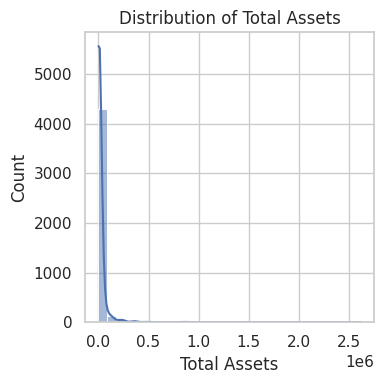

In [43]:
#Distribution of Total Assets and Return on Assets
plt.figure(figsize=(4, 4))
sns.histplot(data['Total Assets'], kde=True, bins=30)
plt.title('Distribution of Total Assets')
plt.tight_layout()
plt.show()

<ipython-input-44-fc79b5c50d40>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='GICS Industry', y='Total Assets', data=data, ci=None)


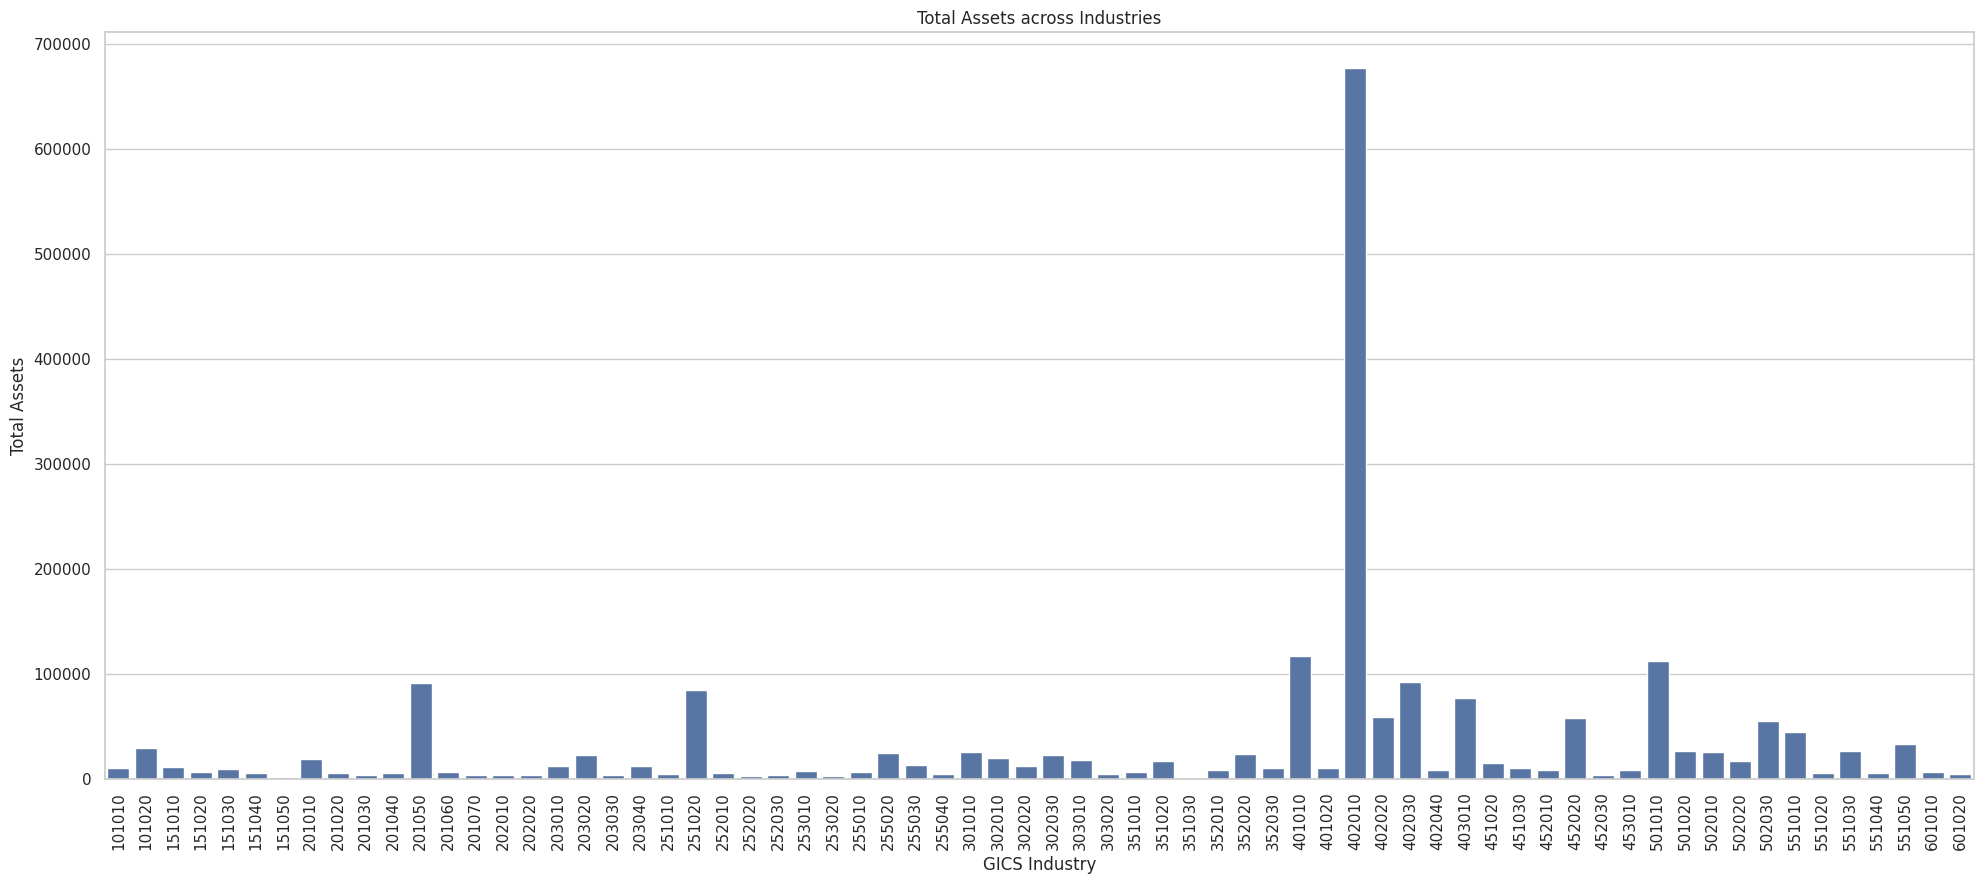

In [44]:
#Box plots for Total Assets and Return on Assets across different industries
plt.figure(figsize=(20, 9))
sns.barplot(x='GICS Industry', y='Total Assets', data=data, ci=None)
plt.title('Total Assets across Industries')
plt.xticks(rotation=90)
plt.xlabel('GICS Industry')
plt.ylabel('Total Assets')
plt.tight_layout()
plt.show()

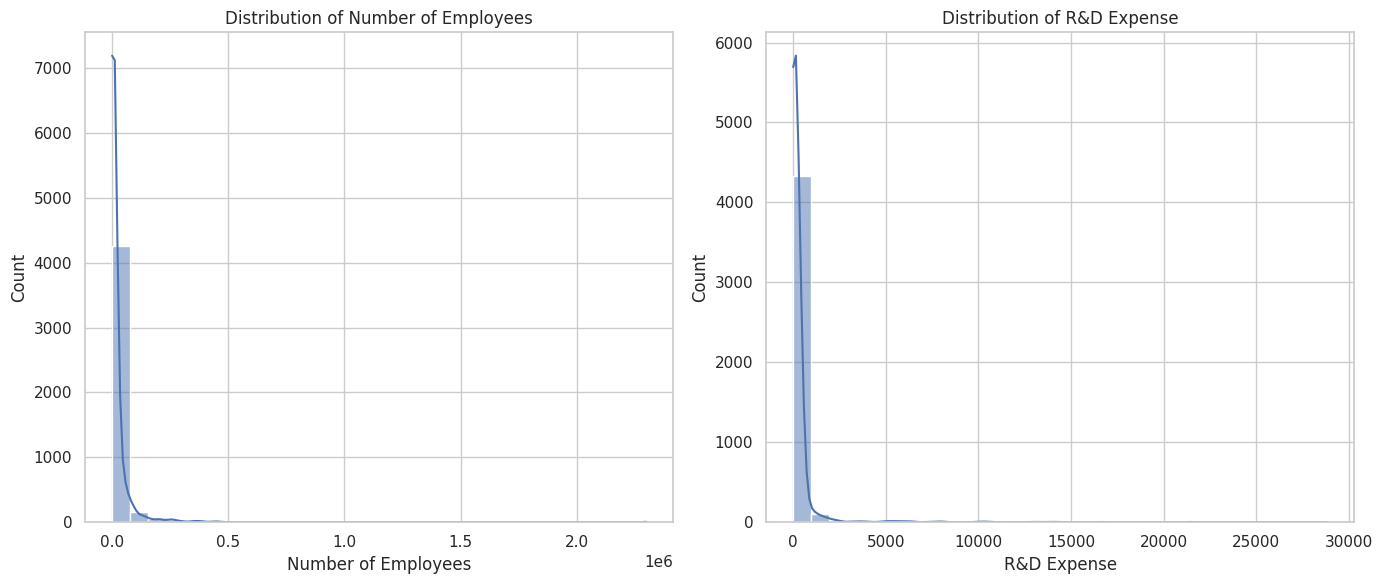

In [45]:
#Distribution of Number of Employees and R&D Expense
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Number of Employees'], kde=True, bins=30)
plt.title('Distribution of Number of Employees')
plt.subplot(1, 2, 2)
sns.histplot(data['R&D Expense'], kde=True, bins=30)
plt.title('Distribution of R&D Expense')
plt.tight_layout()
plt.show()

<ipython-input-46-f002ceef43f6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='GICS Industry', y='Number of Employees', data=data, ci=None)


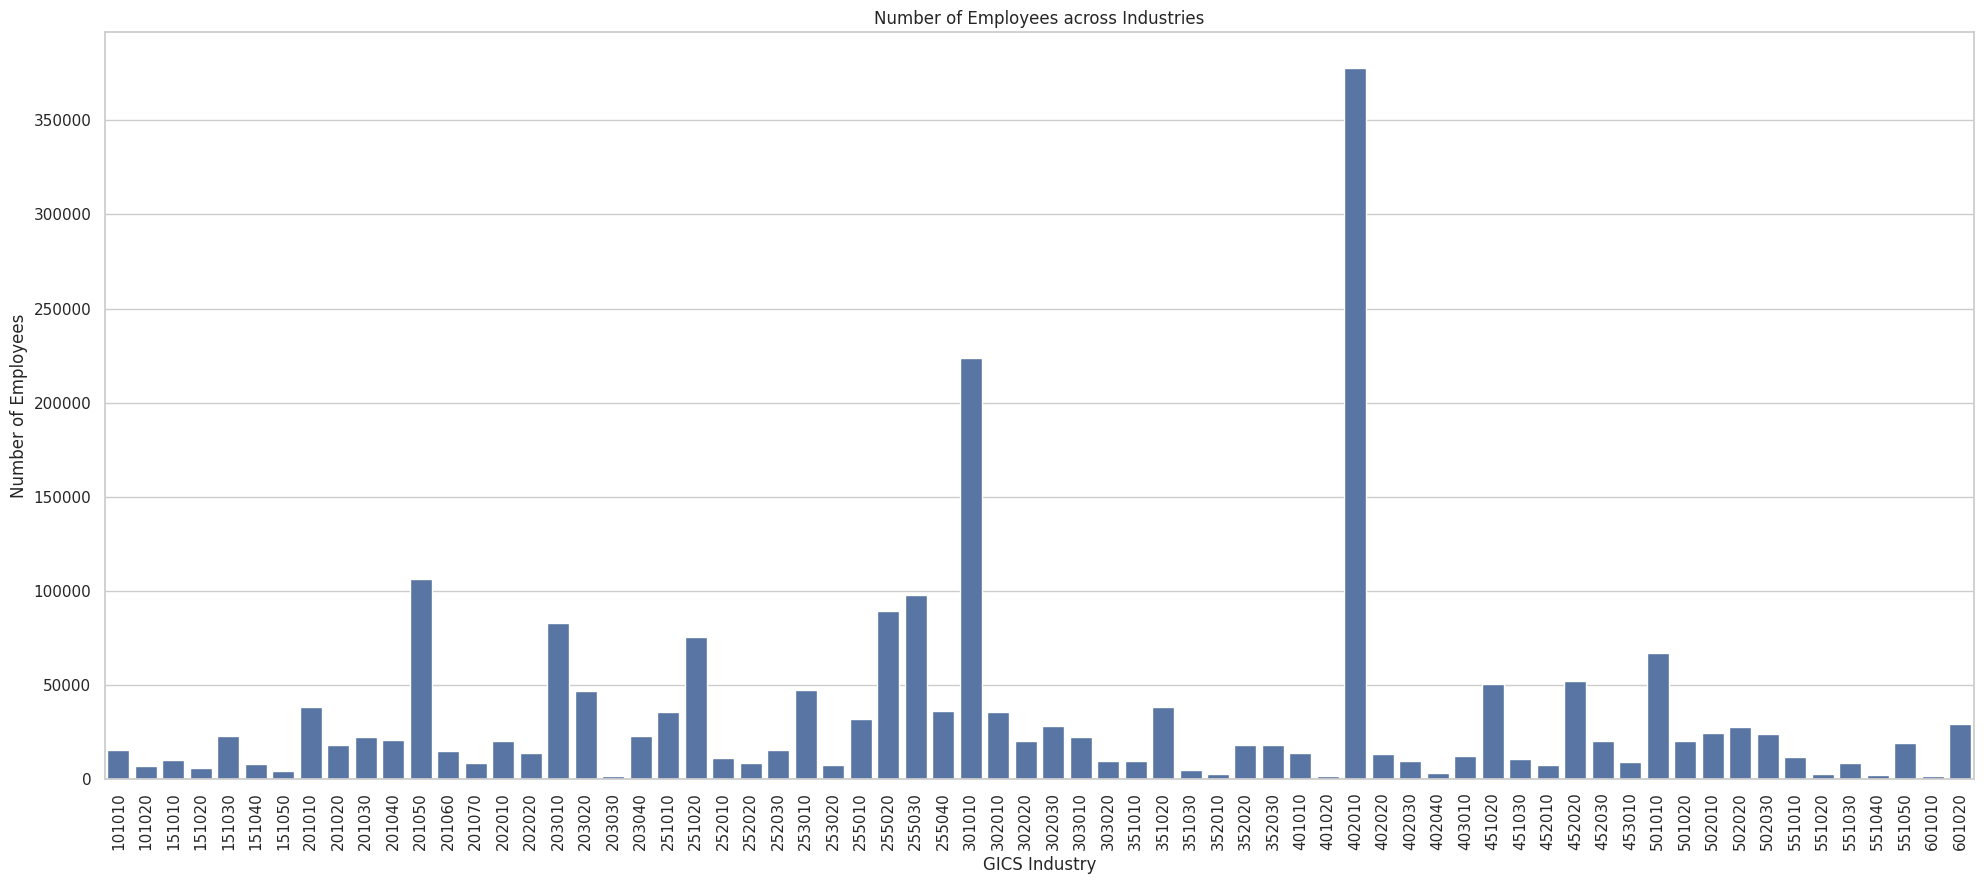

In [46]:
#Barplots for Number of Employees across different industries
plt.figure(figsize=(20, 9))
sns.barplot(x='GICS Industry', y='Number of Employees', data=data, ci=None)
plt.title('Number of Employees across Industries')
plt.xticks(rotation=90)
plt.xlabel('GICS Industry')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

<ipython-input-47-0543abcb9ac8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='GICS Industry', y='R&D Expense', data=data,ci=None)


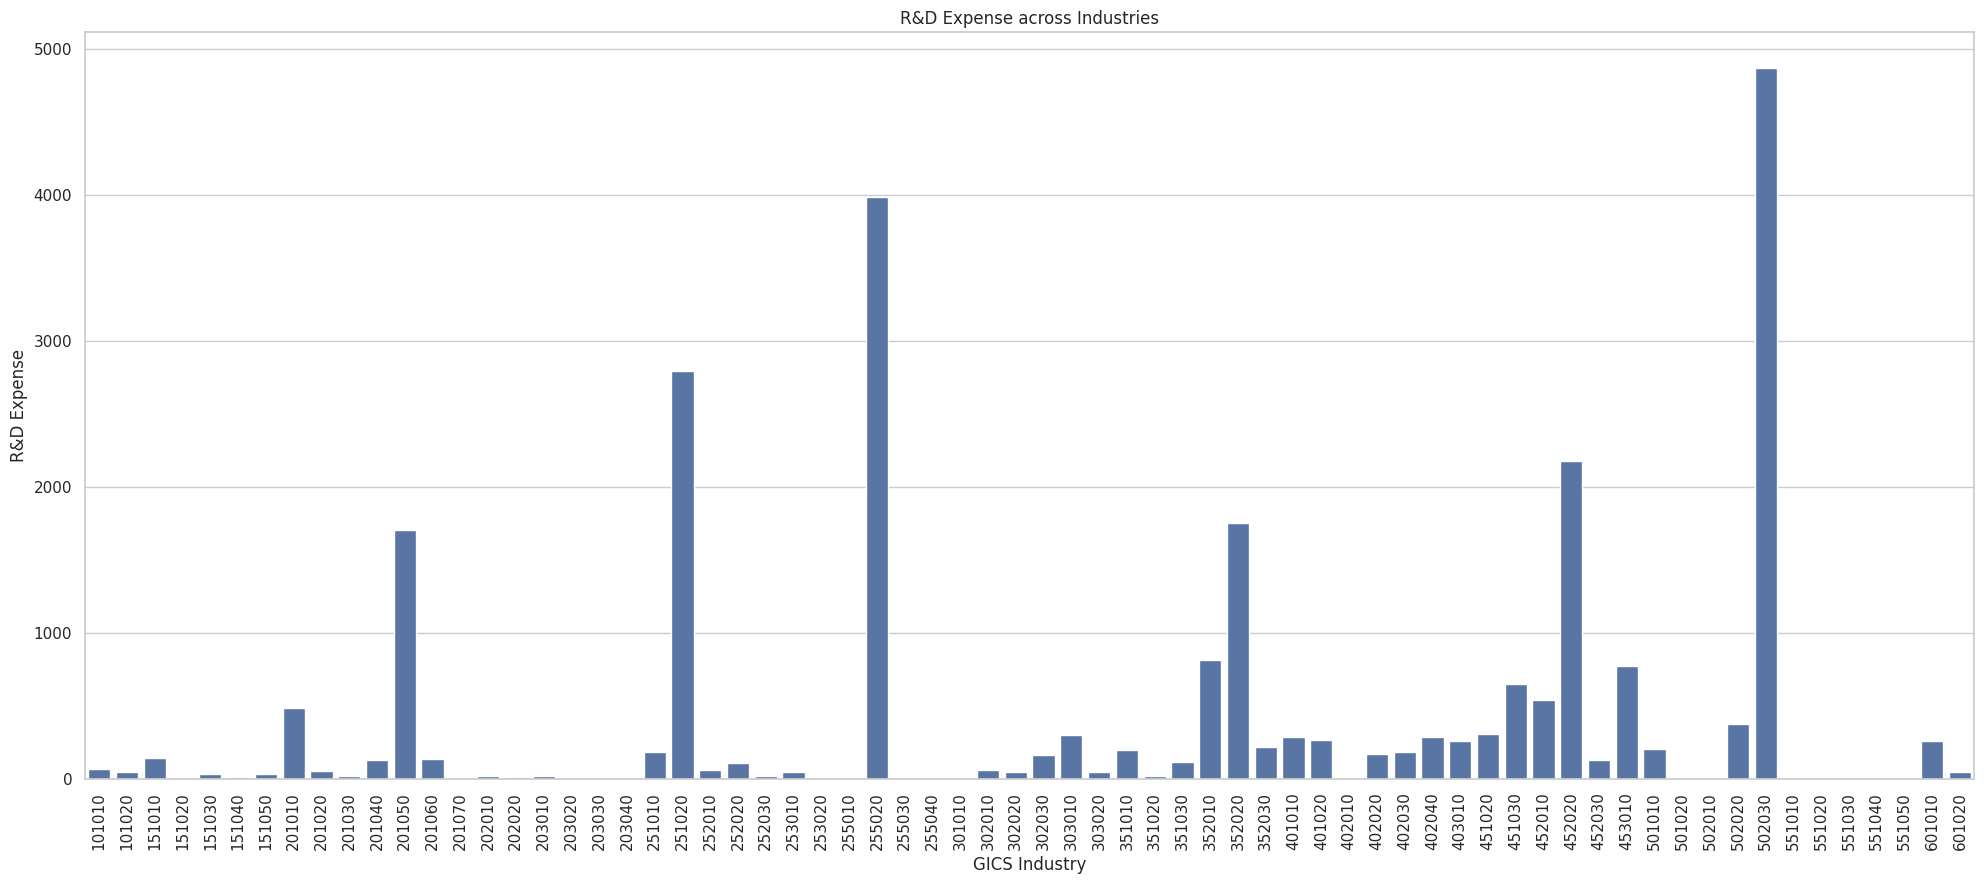

In [47]:
#Barplots for R&D Expense across different industries
plt.figure(figsize=(20, 9))
sns.barplot(x='GICS Industry', y='R&D Expense', data=data,ci=None)
plt.title('R&D Expense across Industries')
plt.xticks(rotation=90)
plt.xlabel('GICS Industry')
plt.ylabel('R&D Expense')
plt.tight_layout()
plt.show()

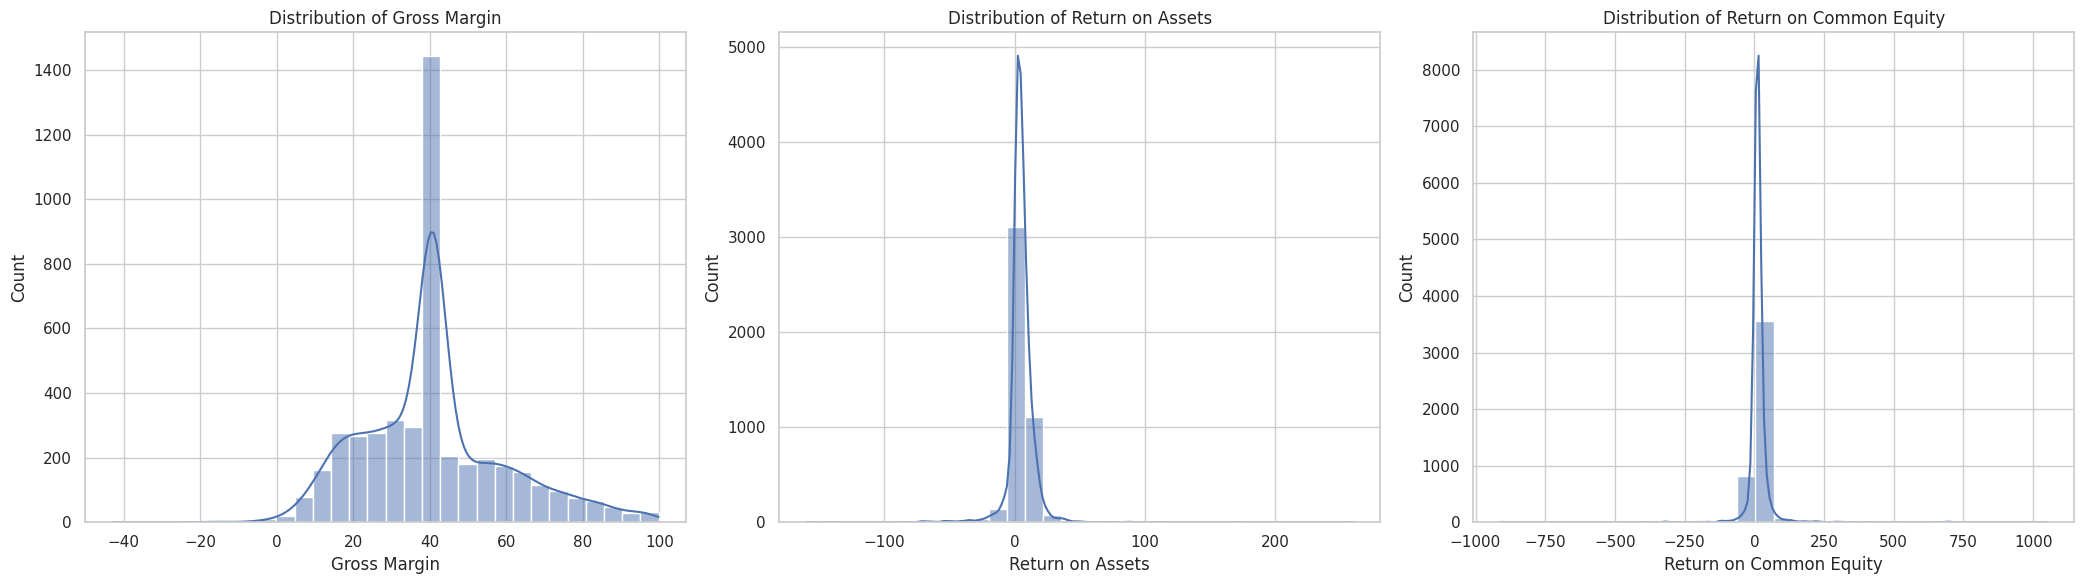

In [48]:
#Distribution of Gross Margin, Return on Assets (ROA), and Return on Common Equity (ROCE)
plt.figure(figsize=(21, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Gross Margin'], kde=True, bins=30)
plt.title('Distribution of Gross Margin')
plt.subplot(1, 3, 2)
sns.histplot(data['Return on Assets'], kde=True, bins=30)
plt.title('Distribution of Return on Assets')
plt.subplot(1, 3, 3)
sns.histplot(data['Return on Common Equity'], kde=True, bins=30)
plt.title('Distribution of Return on Common Equity')
plt.tight_layout()
plt.show()

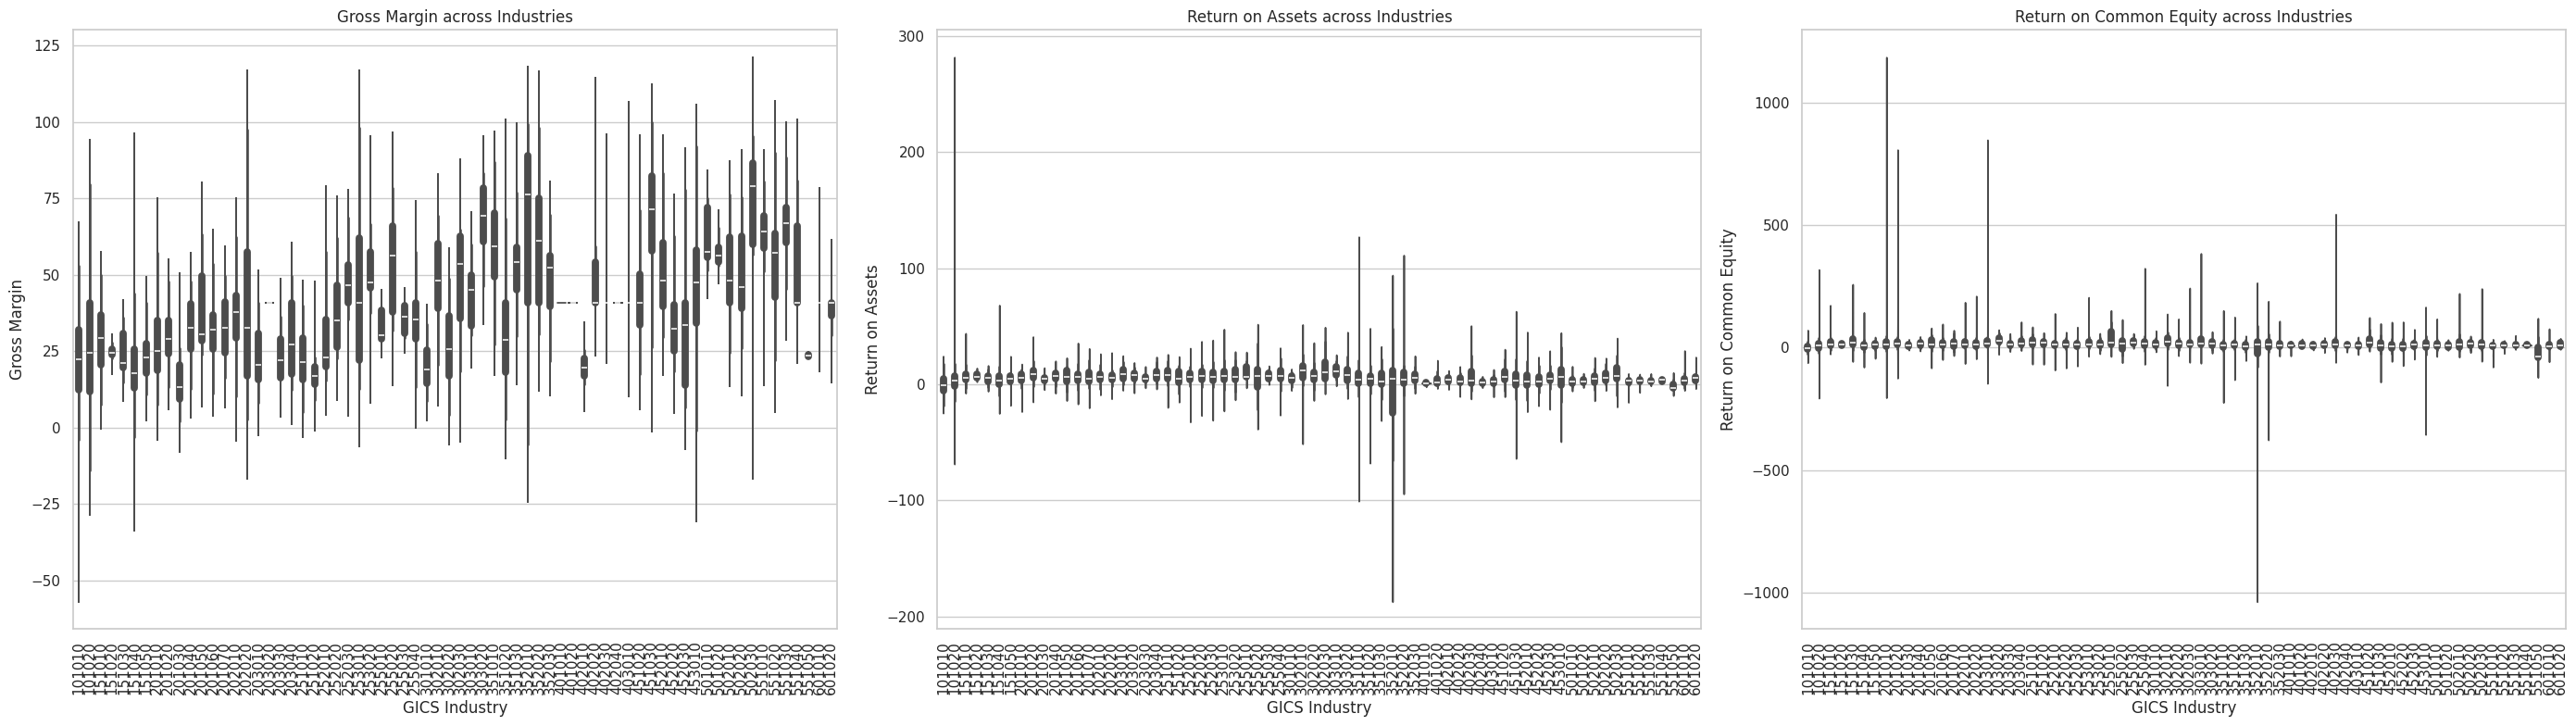

In [49]:
# Violin Plot for Gross Margin, Return on Assets, and Return on Common Equity across different industries
plt.figure(figsize=(28, 8))
plt.subplot(1, 3, 1)
sns.violinplot(x='GICS Industry', y='Gross Margin', data=data)
plt.title('Gross Margin across Industries')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.violinplot(x='GICS Industry', y='Return on Assets', data=data)
plt.title('Return on Assets across Industries')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.violinplot(x='GICS Industry', y='Return on Common Equity', data=data)
plt.title('Return on Common Equity across Industries')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

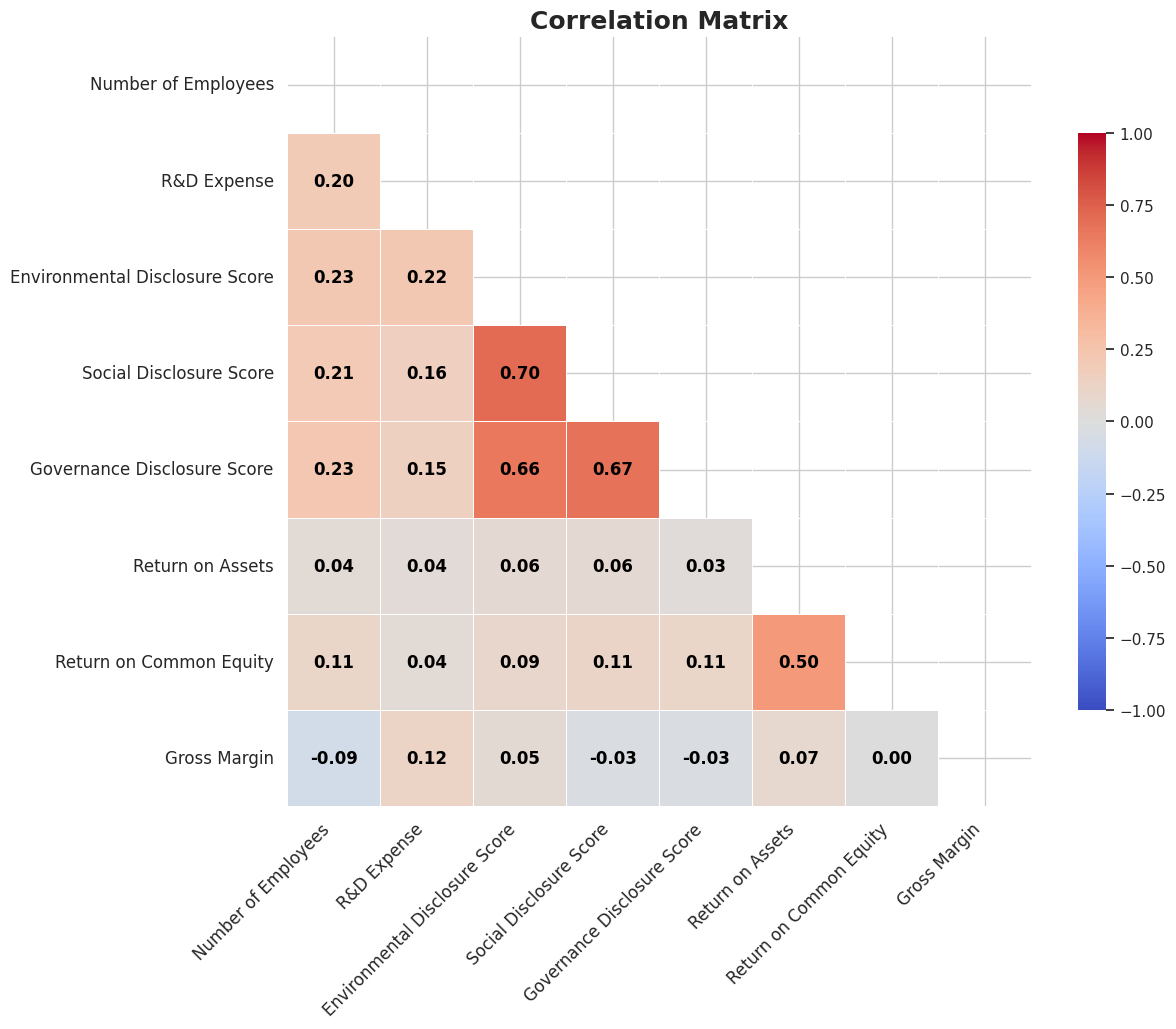

In [50]:
numerical_vars = ['Number of Employees', 'R&D Expense', 'Environmental Disclosure Score', 'Social Disclosure Score', 'Governance Disclosure Score', 'Return on Assets', 'Return on Common Equity', 'Gross Margin']
#Calculating the correlation matrix
corr_matrix = data[numerical_vars].corr()

#Creating a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Matplotlib figure
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmax=1.0,
    vmin=-1.0,
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .75},
    annot_kws={"size": 12, "weight": "bold", "color": "black"}
)
plt.title('Correlation Matrix', fontsize=18, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [51]:
#Converting 'GICS Industry' back to string type
data['GICS Industry'] = data['GICS Industry'].astype(str)

numeric_columns = ['Total Assets', 'Return on Assets', 'Gross Margin', 'Return on Common Equity']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

#Grouping by industry and calculating median values for key metrics
industry_summary = data.groupby('GICS Industry')[numeric_columns].median()

#Resetting index for better readability
industry_summary.reset_index(inplace=True)
industry_summary.sort_values(by=['Total Assets', 'Return on Assets', 'Gross Margin', 'Return on Common Equity'], ascending=False, inplace=True)

#Displaying the summary
print(industry_summary)

leading_sectors = industry_summary[
    (industry_summary['Total Assets'] > industry_summary['Total Assets'].median()) &
    (industry_summary['Return on Assets'] > industry_summary['Return on Assets'].median()) &
    (industry_summary['Gross Margin'] > industry_summary['Gross Margin'].median()) &
    (industry_summary['Return on Common Equity'] > industry_summary['Return on Common Equity'].median())
]

print("Leading Sectors:")
print(leading_sectors)

   GICS Industry  Total Assets  Return on Assets  Gross Margin  \
45        402010   702095.0000           4.10430       19.6769   
61        551010    38278.1280           2.83025       64.0002   
11        201050    36500.0000           6.72810       30.5669   
65        551050    33112.0000          -3.11320       23.4093   
63        551030    24529.0000           2.70900       66.7389   
..           ...           ...               ...           ...   
36        303020     1136.6060           7.73475       69.2781   
37        351010     1078.5020           3.89880       59.2324   
28        255020      579.4845           6.78730       56.2365   
40        352010      519.9450           4.42540       76.1732   
39        351030      411.1190           2.47890       54.1877   

    Return on Common Equity  
45                 8.955800  
61                 9.445600  
11                12.935200  
65               -38.027900  
63                10.189900  
..                      ...

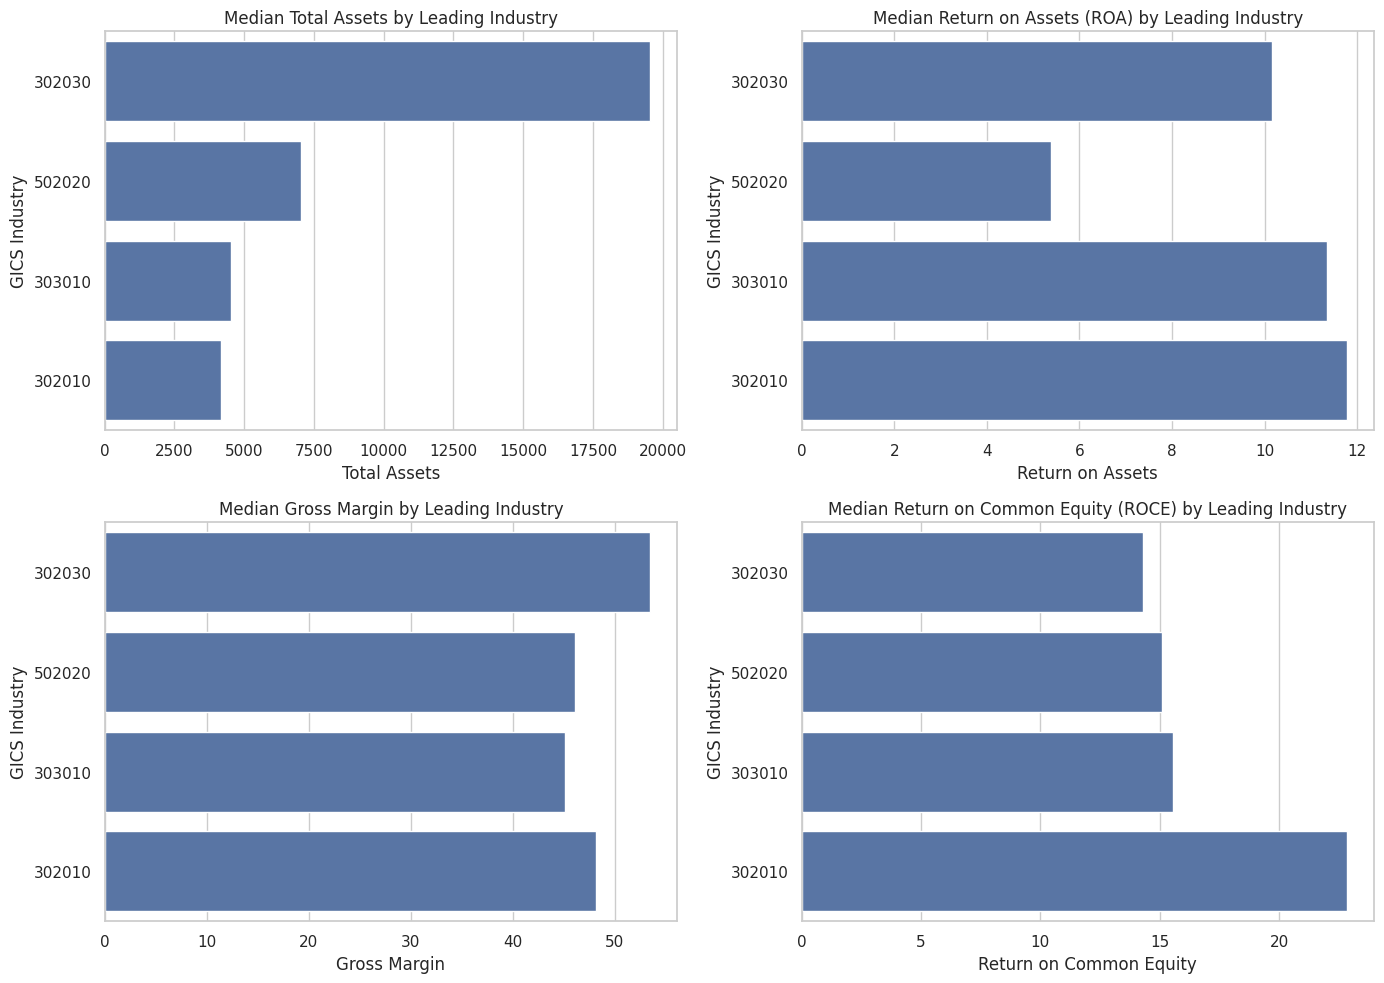

In [52]:
#Plotting the summary metrics for leading industries
plt.figure(figsize=(14, 10))

#Total Assets
plt.subplot(2, 2, 1)
sns.barplot(x='Total Assets', y='GICS Industry', data=leading_sectors)
plt.title('Median Total Assets by Leading Industry')

#Return on Assets (ROA)
plt.subplot(2, 2, 2)
sns.barplot(x='Return on Assets', y='GICS Industry', data=leading_sectors)
plt.title('Median Return on Assets (ROA) by Leading Industry')

#Gross Margin
plt.subplot(2, 2, 3)
sns.barplot(x='Gross Margin', y='GICS Industry', data=leading_sectors)
plt.title('Median Gross Margin by Leading Industry')

#Return on Common Equity (ROCE)
plt.subplot(2, 2, 4)
sns.barplot(x='Return on Common Equity', y='GICS Industry', data=leading_sectors)
plt.title('Median Return on Common Equity (ROCE) by Leading Industry')
plt.tight_layout()
plt.show()

In [69]:
#Loading the preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/Data Analytics RE/Preprocessed.csv')

In [70]:
#Filtering the dataset for the selected organization and competitors in the 502020 industry
industry_data = df[df['GICS Industry'] == 502020]

In [71]:
industry_data

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
19,DIS UN Equity,Walt Disney Co/The,2016,US2546871060,7990.0,502020,US,195000.0,92033.000,0.000,0.000000,0.000000,4610.000,27.907000,33.333300,60.7143,2.1443,10.4220,21.3942,46.0868
462,MCS UN Equity,Marcus Corp/The,2016,US5663301068,7830.0,502020,US,3397.0,911.266,0.000,0.000000,0.000000,3.239,19.249815,22.714809,48.2143,1.5300,4.4064,10.3291,46.8847
523,EA UW Equity,Electronic Arts Inc,2016,US2855121099,7372.0,502020,US,8500.0,7050.000,1109.000,1109.000000,1109.000000,2493.000,19.249815,8.771900,51.7857,3.3406,17.5191,35.7618,69.1993
538,ATVI UW Equity,Activision Blizzard Inc,2016,US00507V1098,7372.0,502020,US,9600.0,17452.000,958.000,958.000000,958.000000,3245.000,19.249815,14.035100,51.7857,2.0200,5.9086,11.1945,63.7712
600,TTWO UW Equity,Take-Two Interactive Software Inc,2016,US8740541094,7372.0,502020,US,2933.0,2590.277,119.807,119.807000,119.807000,798.742,19.249815,8.771900,51.7857,2.0346,-0.3446,-1.4508,42.4295
706,LYV UN Equity,Live Nation Entertainment Inc,2016,US5380341090,7900.0,502020,US,8300.0,6764.266,0.000,0.000000,0.000000,1526.591,1.550400,14.035100,51.7857,1.6360,0.0455,-3.9789,27.1962
791,NFLX UW Equity,Netflix Inc,2016,US64110L1061,7841.0,502020,US,4700.0,13586.610,780.232,780.232000,780.232000,1467.576,19.249815,3.508800,51.7857,4.7214,1.5694,7.6145,29.1394
1414,CNK UN Equity,Cinemark Holdings Inc,2016,US17243V1026,7830.0,502020,US,7002.0,4306.633,0.000,0.000000,0.000000,561.235,1.550400,17.543900,51.7857,1.7421,6.0497,21.6039,61.7261
1456,WWE UN Equity,World Wrestling Entertainment Inc,2016,US98156Q1085,7812.0,502020,US,870.0,600.903,0.000,277.162533,283.099503,211.976,19.249815,8.771900,48.2143,2.9253,6.7009,15.0719,41.0282
1525,DIS UN Equity,Walt Disney Co/The,2017,US2546871060,7990.0,502020,US,199000.0,95789.000,0.000,0.000000,0.000000,4017.000,31.782900,33.333300,66.0714,2.1297,9.5622,21.2343,45.0351


In [56]:
industry_data.count()

Ticker                              27
Name                                27
Year                                27
ISIN Number                         27
SIC Code                            27
GICS Industry                       27
Country or Territory of Domicile    27
Number of Employees                 27
Total Assets                        27
R&D Expense                         27
R&D Expense Adjusted                27
Operating Expenses R&D              27
Cash and Cash Equivalents           27
Environmental Disclosure Score      27
Social Disclosure Score             27
Governance Disclosure Score         27
Tobin's Q Ratio                     27
Return on Assets                    27
Return on Common Equity             27
Gross Margin                        27
dtype: int64

In [57]:
industry_data.describe()

,Year,SIC Code,GICS Industry,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
count,27.00000,27.000000,27.0,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2017.00000,7702.111111,502020.0,27720.111111,17505.070593,376.593963,397.26578,397.705556,1951.820593,13.374089,15.201263,52.513219,2.998552,6.391548,15.007211,48.451289
std,0.83205,243.303440,0.0,61562.333597,28913.697164,516.705392,506.59566,506.489856,1665.493857,10.418904,8.080332,3.939146,1.697082,4.858607,11.220063,14.942243
min,2016.00000,7372.000000,502020.0,850.000000,600.903000,0.000000,0.00000,0.000000,3.239000,1.550400,3.508800,46.428600,1.307100,-0.344600,-8.464400,25.862200
25%,2016.00000,7372.000000,502020.0,3552.000000,2869.715500,0.000000,0.00000,0.000000,474.384500,1.550400,10.526300,51.785700,1.881050,2.887200,9.330050,38.959950
50%,2017.00000,7830.000000,502020.0,8300.000000,7050.000000,0.000000,119.80700,119.807000,1526.591000,19.249815,14.035100,51.785700,2.270100,5.384800,15.071900,46.086800
75%,2018.00000,7841.000000,502020.0,9700.000000,17643.500000,955.855000,955.85500,955.855000,3519.741500,19.249815,17.543900,51.785700,3.815600,9.843700,21.499050,62.741700
max,2018.00000,7990.000000,502020.0,201000.000000,98598.000000,1320.000000,1320.00000,1320.000000,4713.000000,31.782900,33.333300,66.071400,8.873500,17.519100,35.761800,75.203900


In [58]:
#Filtering for Walt Disney Co. and competitors
disney_data = industry_data[industry_data['Name'].str.contains("Walt Disney")]
competitors_data = industry_data[~industry_data['Name'].str.contains("Walt Disney")]

In [59]:
disney_data

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
19,DIS UN Equity,Walt Disney Co/The,2016,US2546871060,7990.0,502020,US,195000.0,92033.0,0.0,0.0,0.0,4610.0,27.9070,33.3333,60.7143,2.1443,10.4220,21.3942,46.0868
1525,DIS UN Equity,Walt Disney Co/The,2017,US2546871060,7990.0,502020,US,199000.0,95789.0,0.0,0.0,0.0,4017.0,31.7829,33.3333,66.0714,2.1297,9.5622,21.2343,45.0351
3031,DIS UN Equity,Walt Disney Co/The,2018,US2546871060,7990.0,502020,US,201000.0,98598.0,0.0,0.0,0.0,4150.0,31.7829,33.3333,60.7143,2.2701,12.9618,27.9682,44.9372


In [60]:
competitors_data

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
462,MCS UN Equity,Marcus Corp/The,2016,US5663301068,7830.0,502020,US,3397.0,911.266,0.000,0.000000,0.000000,3.239,19.249815,22.714809,48.2143,1.5300,4.4064,10.3291,46.8847
523,EA UW Equity,Electronic Arts Inc,2016,US2855121099,7372.0,502020,US,8500.0,7050.000,1109.000,1109.000000,1109.000000,2493.000,19.249815,8.771900,51.7857,3.3406,17.5191,35.7618,69.1993
538,ATVI UW Equity,Activision Blizzard Inc,2016,US00507V1098,7372.0,502020,US,9600.0,17452.000,958.000,958.000000,958.000000,3245.000,19.249815,14.035100,51.7857,2.0200,5.9086,11.1945,63.7712
600,TTWO UW Equity,Take-Two Interactive Software Inc,2016,US8740541094,7372.0,502020,US,2933.0,2590.277,119.807,119.807000,119.807000,798.742,19.249815,8.771900,51.7857,2.0346,-0.3446,-1.4508,42.4295
706,LYV UN Equity,Live Nation Entertainment Inc,2016,US5380341090,7900.0,502020,US,8300.0,6764.266,0.000,0.000000,0.000000,1526.591,1.550400,14.035100,51.7857,1.6360,0.0455,-3.9789,27.1962
791,NFLX UW Equity,Netflix Inc,2016,US64110L1061,7841.0,502020,US,4700.0,13586.610,780.232,780.232000,780.232000,1467.576,19.249815,3.508800,51.7857,4.7214,1.5694,7.6145,29.1394
1414,CNK UN Equity,Cinemark Holdings Inc,2016,US17243V1026,7830.0,502020,US,7002.0,4306.633,0.000,0.000000,0.000000,561.235,1.550400,17.543900,51.7857,1.7421,6.0497,21.6039,61.7261
1456,WWE UN Equity,World Wrestling Entertainment Inc,2016,US98156Q1085,7812.0,502020,US,870.0,600.903,0.000,277.162533,283.099503,211.976,19.249815,8.771900,48.2143,2.9253,6.7009,15.0719,41.0282
1968,MCS UN Equity,Marcus Corp/The,2017,US5663301068,7830.0,502020,US,3198.0,1017.797,0.000,0.000000,0.000000,16.248,1.550400,14.035100,51.7857,1.3071,6.7386,15.5654,47.8901
2029,EA UW Equity,Electronic Arts Inc,2017,US2855121099,7372.0,502020,US,8800.0,7718.000,1205.000,1205.000000,1205.000000,2565.000,19.249815,14.035100,51.7857,4.0464,13.0959,25.9319,73.2095


In [61]:
#Descriptive statistics for the entire industry
desc_stats_industry = industry_data.describe()

#Descriptive statistics for Walt Disney Co.
desc_stats_disney = disney_data.describe()

print("Descriptive Statistics for Industry")
print(desc_stats_industry)

print("Descriptive Statistics for Walt Disney Co.")
print(desc_stats_disney)

Descriptive Statistics for Industry
             Year     SIC Code  GICS Industry  Number of Employees  \
count    27.00000    27.000000           27.0            27.000000   
mean   2017.00000  7702.111111       502020.0         27720.111111   
std       0.83205   243.303440            0.0         61562.333597   
min    2016.00000  7372.000000       502020.0           850.000000   
25%    2016.00000  7372.000000       502020.0          3552.000000   
50%    2017.00000  7830.000000       502020.0          8300.000000   
75%    2018.00000  7841.000000       502020.0          9700.000000   
max    2018.00000  7990.000000       502020.0        201000.000000   

       Total Assets  R&D Expense  R&D Expense Adjusted  \
count     27.000000    27.000000              27.00000   
mean   17505.070593   376.593963             397.26578   
std    28913.697164   516.705392             506.59566   
min      600.903000     0.000000               0.00000   
25%     2869.715500     0.000000           

<ipython-input-62-59e0c282eef3>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='Total Assets', data=industry_data, ci=None, palette="viridis")
<ipython-input-62-59e0c282eef3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Total Assets', data=industry_data, ci=None, palette="viridis")
<ipython-input-62-59e0c282eef3>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='Number of Employees', data=industry_data, ci=None, palette="viridis")
<ipython-input-62-59e0c282eef3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Nu

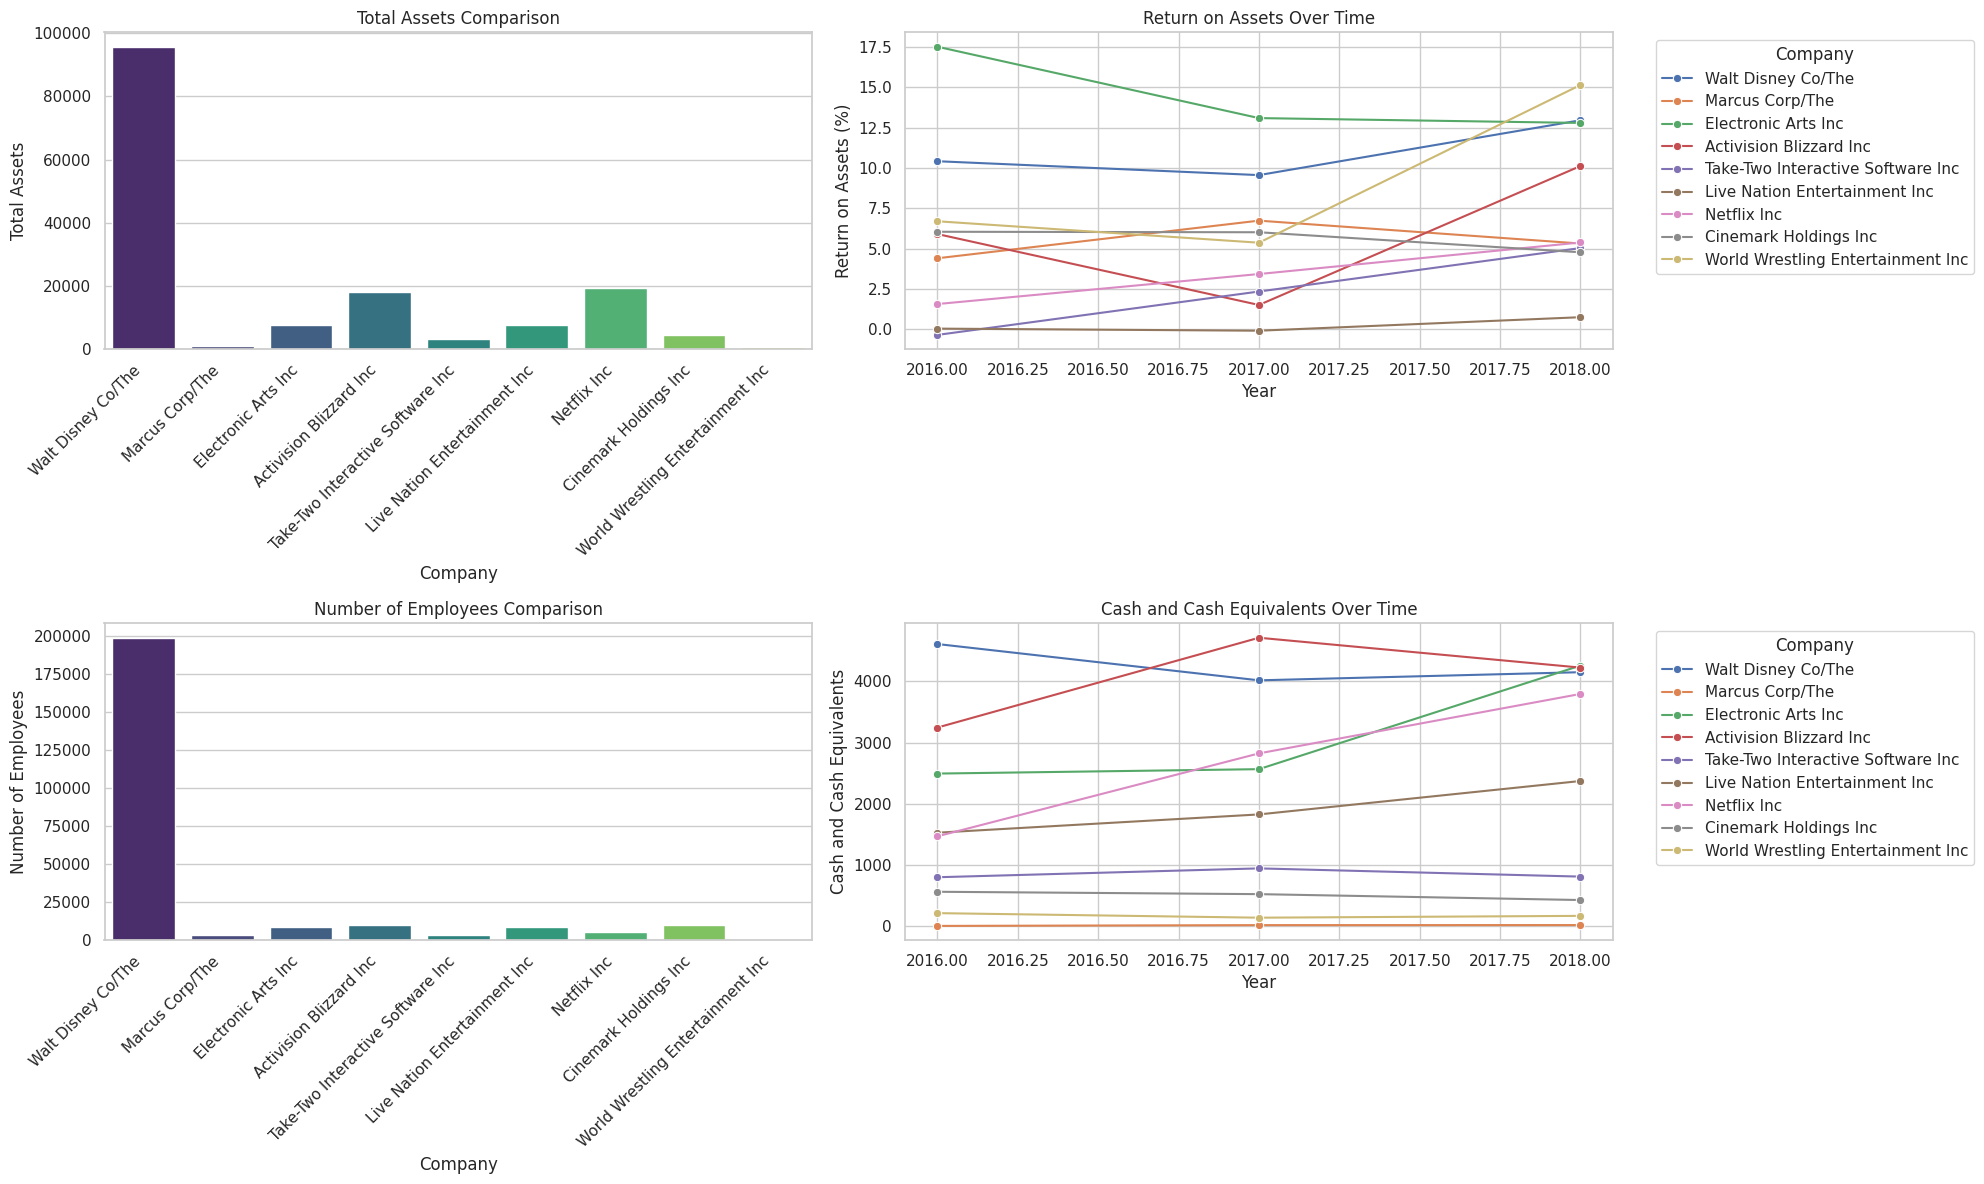

In [62]:
#Descriptive Statistics and Visualizations
#Seting the overall theme for the plots
sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 12))

#Bar plot for Total Assets
plt.subplot(2, 2, 1)
sns.barplot(x='Name', y='Total Assets', data=industry_data, ci=None, palette="viridis")
plt.title('Total Assets Comparison')
plt.xlabel('Company')
plt.ylabel('Total Assets')
plt.xticks(rotation=45, ha='right')

#Line plot for Return on Assets over the years
plt.subplot(2, 2, 2)
companies = industry_data['Name'].unique()
for company in companies:
    subset = industry_data[industry_data['Name'] == company]
    sns.lineplot(x='Year', y='Return on Assets', data=subset, marker='o', label=company)
plt.title('Return on Assets Over Time')
plt.xlabel('Year')
plt.ylabel('Return on Assets (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Company')

#Bar plot for Number of Employees
plt.subplot(2, 2, 3)
sns.barplot(x='Name', y='Number of Employees', data=industry_data, ci=None, palette="viridis")
plt.title('Number of Employees Comparison')
plt.xlabel('Company')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')

#Line plot for R&D Expense over the years
plt.subplot(2, 2, 4)
for company in companies:
    subset = industry_data[industry_data['Name'] == company]
    sns.lineplot(x='Year', y='Cash and Cash Equivalents', data=subset, marker='o', label=company)
plt.title('Cash and Cash Equivalents Over Time')
plt.xlabel('Year')
plt.ylabel('Cash and Cash Equivalents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Company')
plt.tight_layout()
plt.show()

<ipython-input-63-a672a719e417>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROA'] = data['Return on Assets']
<ipython-input-63-a672a719e417>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROE'] = data['Return on Common Equity']
<ipython-input-63-a672a719e417>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

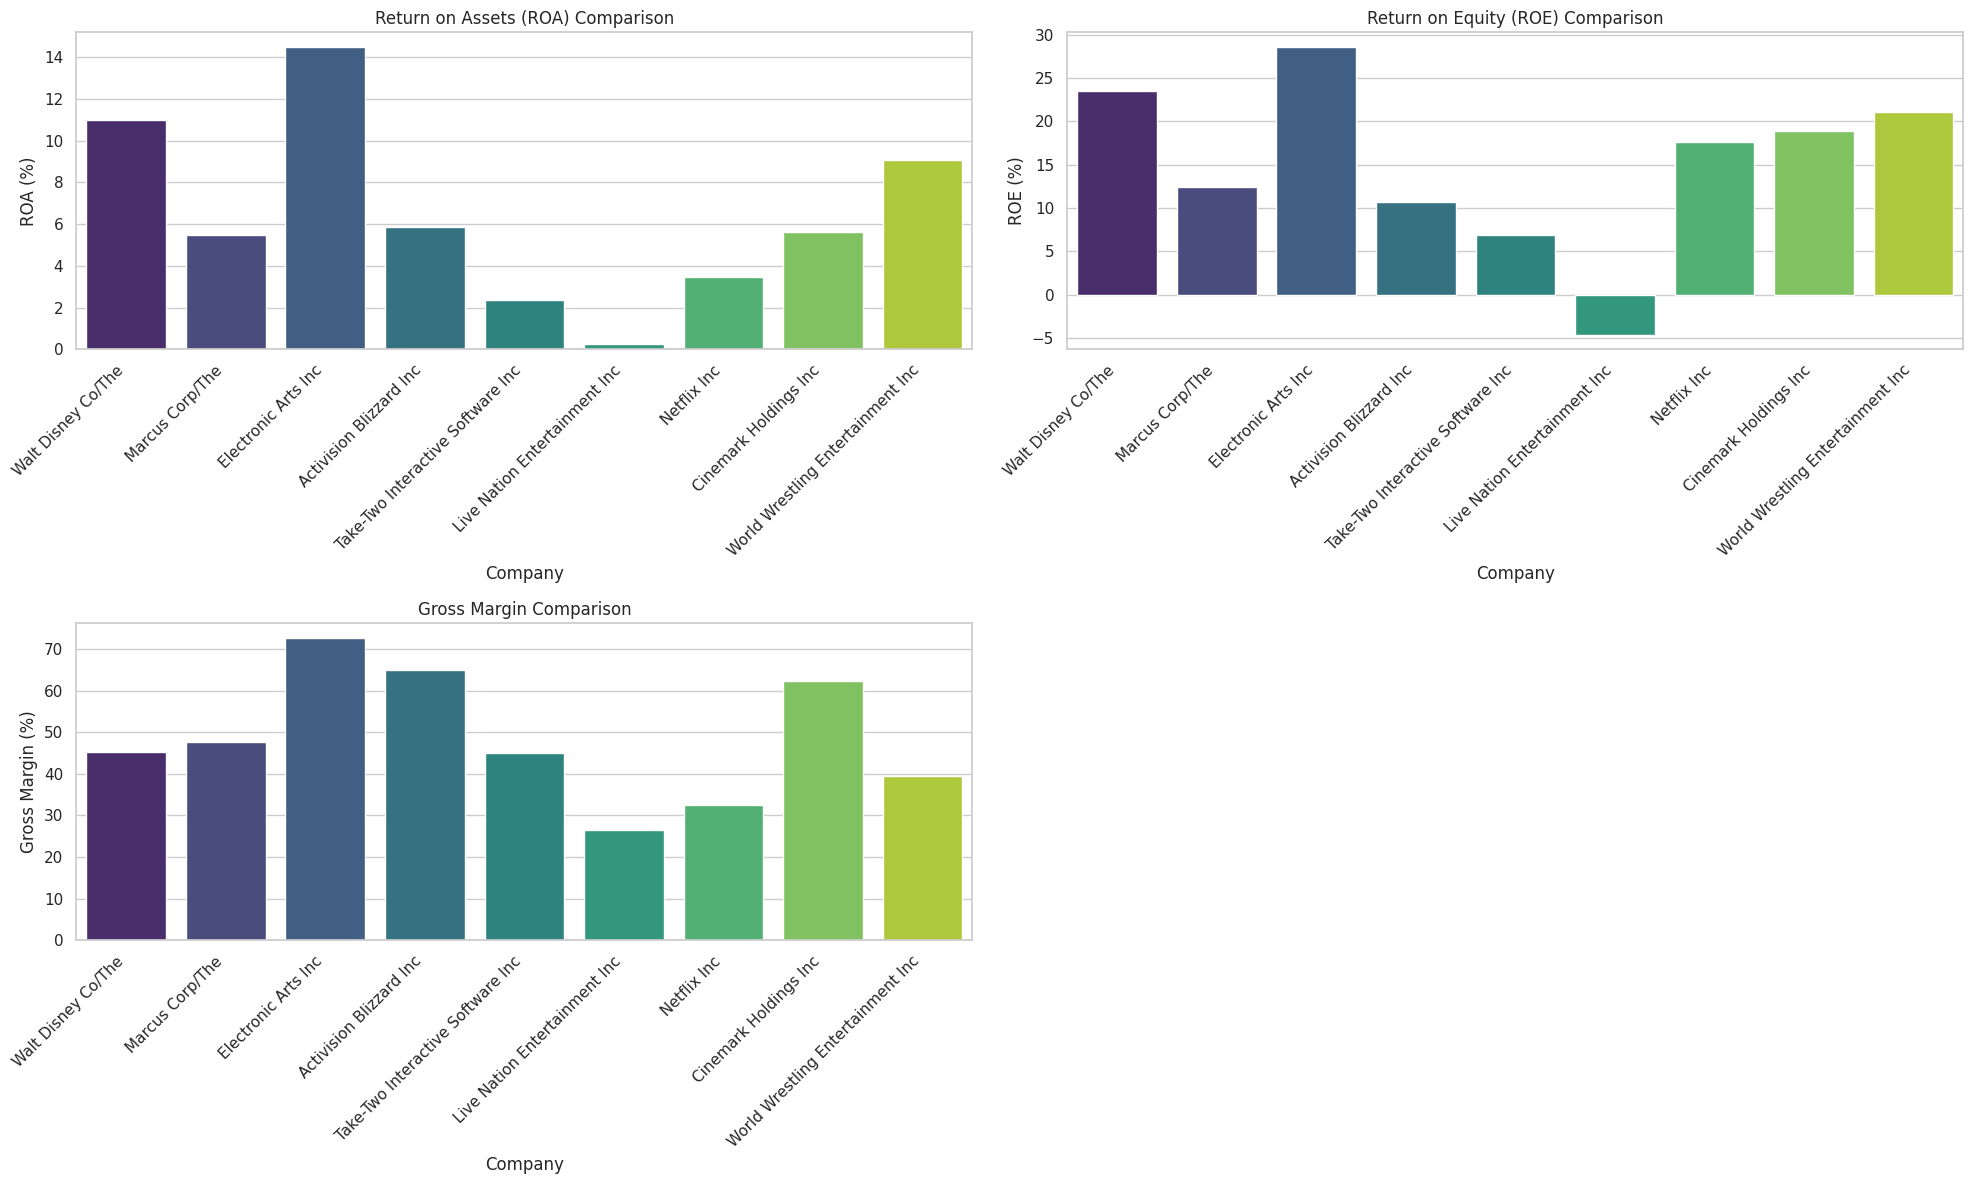

In [63]:
#Comparative Financial Ratios Analysis
#Defining a function to calculate financial ratios
def calculate_ratios(data):
    data['ROA'] = data['Return on Assets']
    data['ROE'] = data['Return on Common Equity']
    data['Gross Margin'] = data['Gross Margin']
    return data

#Calculating ratios for the industry data
industry_ratios = calculate_ratios(industry_data)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 12))

#Bar plot for Return on Assets (ROA)
plt.subplot(2, 2, 1)
sns.barplot(x='Name', y='ROA', data=industry_ratios, ci=None, palette="viridis")
plt.title('Return on Assets (ROA) Comparison')
plt.xlabel('Company')
plt.ylabel('ROA (%)')
plt.xticks(rotation=45, ha='right')

#Bar plot for Return on Equity (ROE)
plt.subplot(2, 2, 2)
sns.barplot(x='Name', y='ROE', data=industry_ratios, ci=None, palette="viridis")
plt.title('Return on Equity (ROE) Comparison')
plt.xlabel('Company')
plt.ylabel('ROE (%)')
plt.xticks(rotation=45, ha='right')

#Bar plot for Gross Margin
plt.subplot(2, 2, 3)
sns.barplot(x='Name', y='Gross Margin', data=industry_ratios, ci=None, palette="viridis")
plt.title('Gross Margin Comparison')
plt.xlabel('Company')
plt.ylabel('Gross Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-64-a275fd2eafe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_data['Year'] = industry_data['Year'].astype(int)


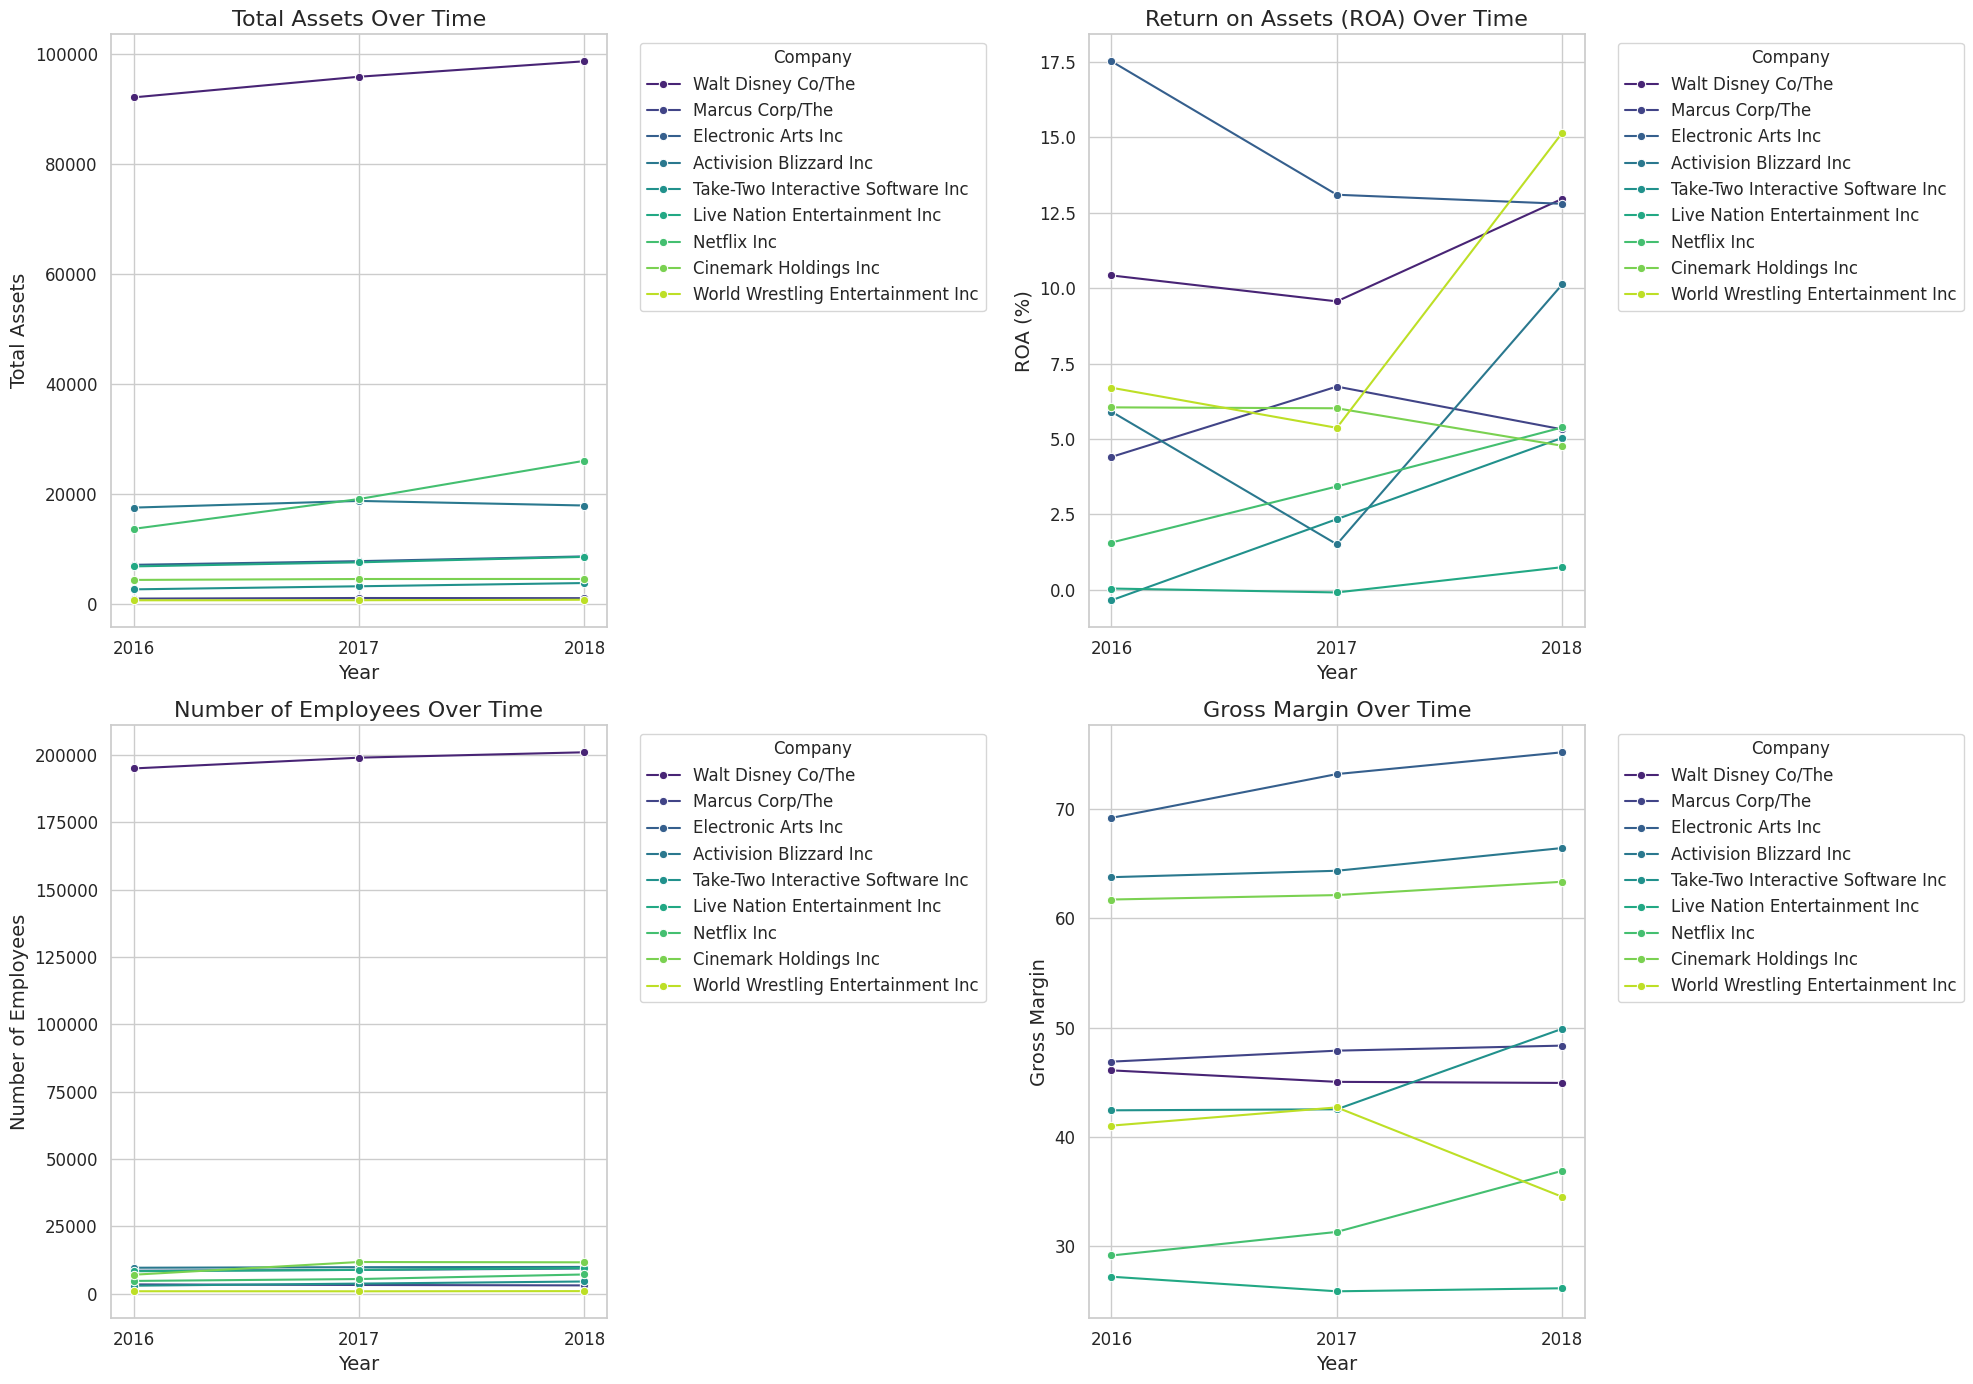

In [64]:
industry_data['Year'] = industry_data['Year'].astype(int)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 14))
palette = sns.color_palette("viridis", n_colors=len(industry_data['Name'].unique()))

#Line plot for Total Assets over the years
plt.subplot(2, 2, 1)
sns.lineplot(x='Year', y='Total Assets', hue='Name', data=industry_data, marker='o', palette=palette)
plt.title('Total Assets Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Assets', fontsize=14)
plt.xticks(ticks=industry_data['Year'].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Company', fontsize=12)

#Line plot for Return on Assets (ROA) over the years
plt.subplot(2, 2, 2)
sns.lineplot(x='Year', y='Return on Assets', hue='Name', data=industry_data, marker='o', palette=palette)
plt.title('Return on Assets (ROA) Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('ROA (%)', fontsize=14)
plt.xticks(ticks=industry_data['Year'].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Company', fontsize=12)

#Line plot for Number of Employees over the years
plt.subplot(2, 2, 3)
sns.lineplot(x='Year', y='Number of Employees', hue='Name', data=industry_data, marker='o', palette=palette)
plt.title('Number of Employees Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(ticks=industry_data['Year'].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Company', fontsize=12)

#Line plot for Gross Margin over the years
plt.subplot(2, 2, 4)
sns.lineplot(x='Year', y='Gross Margin', hue='Name', data=industry_data, marker='o', palette=palette)
plt.title('Gross Margin Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gross Margin', fontsize=14)
plt.xticks(ticks=industry_data['Year'].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Company', fontsize=12)

#Highlights Walt Disney Co. in all plots
for ax in plt.gcf().axes:
    lines = ax.get_lines()
    for line in lines:
      if line.get_label() == 'Walt Disney Co/The':
            line.set_linewidth(5)
            line.set_color('red')
plt.tight_layout()
plt.show()

In [65]:
industry_data

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,...,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin,ROA,ROE
19,DIS UN Equity,Walt Disney Co/The,2016,US2546871060,7990.0,502020,US,195000.0,92033.000,0.000,...,4610.000,27.907000,33.333300,60.7143,2.1443,10.4220,21.3942,46.0868,10.4220,21.3942
462,MCS UN Equity,Marcus Corp/The,2016,US5663301068,7830.0,502020,US,3397.0,911.266,0.000,...,3.239,19.249815,22.714809,48.2143,1.5300,4.4064,10.3291,46.8847,4.4064,10.3291
523,EA UW Equity,Electronic Arts Inc,2016,US2855121099,7372.0,502020,US,8500.0,7050.000,1109.000,...,2493.000,19.249815,8.771900,51.7857,3.3406,17.5191,35.7618,69.1993,17.5191,35.7618
538,ATVI UW Equity,Activision Blizzard Inc,2016,US00507V1098,7372.0,502020,US,9600.0,17452.000,958.000,...,3245.000,19.249815,14.035100,51.7857,2.0200,5.9086,11.1945,63.7712,5.9086,11.1945
600,TTWO UW Equity,Take-Two Interactive Software Inc,2016,US8740541094,7372.0,502020,US,2933.0,2590.277,119.807,...,798.742,19.249815,8.771900,51.7857,2.0346,-0.3446,-1.4508,42.4295,-0.3446,-1.4508
706,LYV UN Equity,Live Nation Entertainment Inc,2016,US5380341090,7900.0,502020,US,8300.0,6764.266,0.000,...,1526.591,1.550400,14.035100,51.7857,1.6360,0.0455,-3.9789,27.1962,0.0455,-3.9789
791,NFLX UW Equity,Netflix Inc,2016,US64110L1061,7841.0,502020,US,4700.0,13586.610,780.232,...,1467.576,19.249815,3.508800,51.7857,4.7214,1.5694,7.6145,29.1394,1.5694,7.6145
1414,CNK UN Equity,Cinemark Holdings Inc,2016,US17243V1026,7830.0,502020,US,7002.0,4306.633,0.000,...,561.235,1.550400,17.543900,51.7857,1.7421,6.0497,21.6039,61.7261,6.0497,21.6039
1456,WWE UN Equity,World Wrestling Entertainment Inc,2016,US98156Q1085,7812.0,502020,US,870.0,600.903,0.000,...,211.976,19.249815,8.771900,48.2143,2.9253,6.7009,15.0719,41.0282,6.7009,15.0719
1525,DIS UN Equity,Walt Disney Co/The,2017,US2546871060,7990.0,502020,US,199000.0,95789.000,0.000,...,4017.000,31.782900,33.333300,66.0714,2.1297,9.5622,21.2343,45.0351,9.5622,21.2343


<ipython-input-72-dec3c1d1b83c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry_data['Year'] = industry_data['Year'].astype(int)


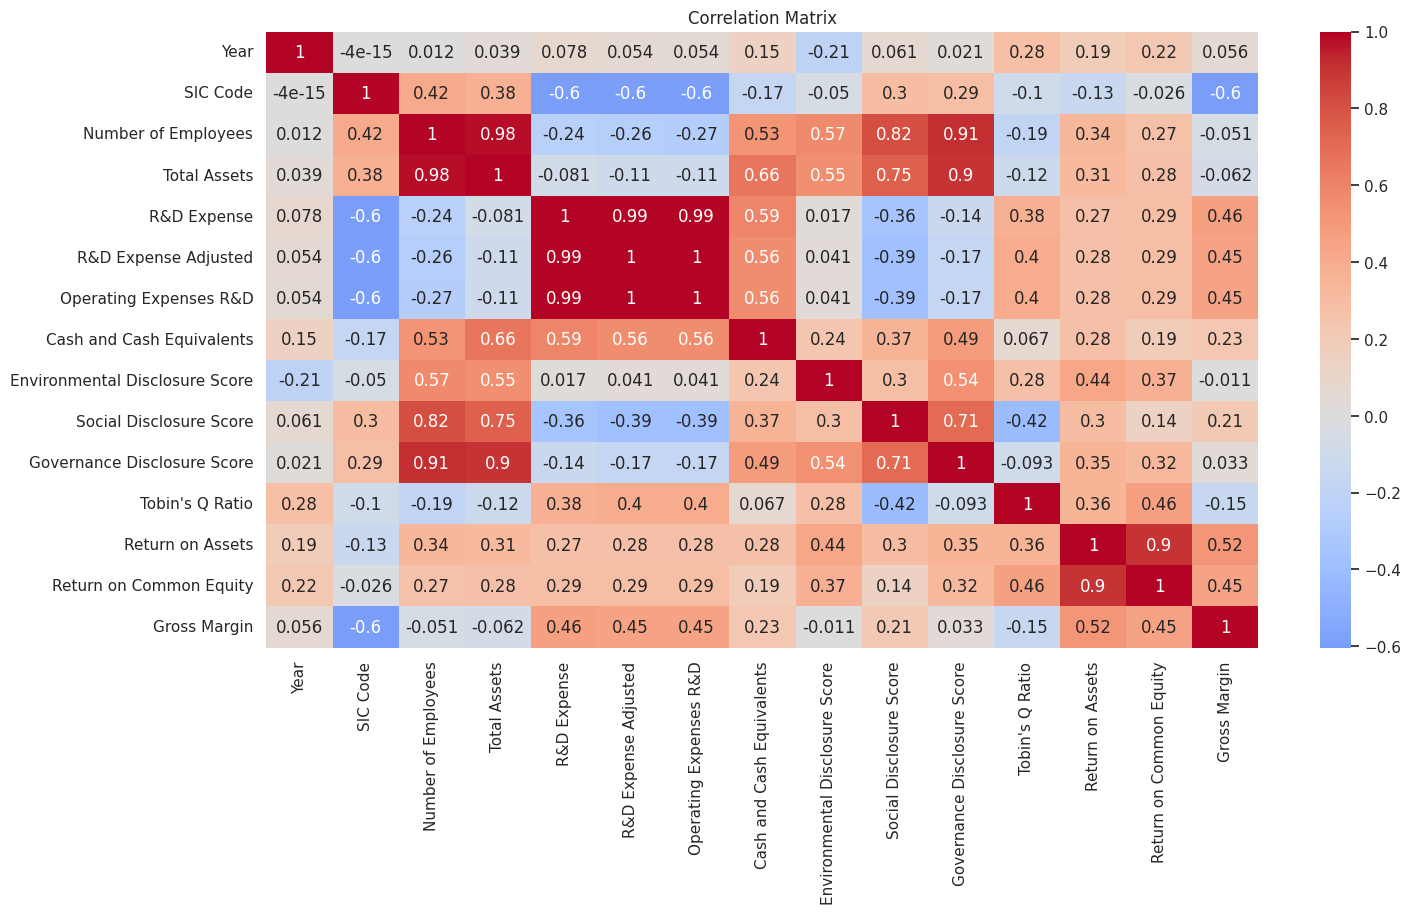

Total Assets                      1.000000
Number of Employees               0.976567
Governance Disclosure Score       0.903566
Social Disclosure Score           0.746312
Cash and Cash Equivalents         0.655776
Environmental Disclosure Score    0.546389
SIC Code                          0.375761
Return on Assets                  0.313438
Return on Common Equity           0.278430
Year                              0.038533
Gross Margin                     -0.061820
R&D Expense                      -0.080792
R&D Expense Adjusted             -0.106914
Operating Expenses R&D           -0.107463
Tobin's Q Ratio                  -0.120398
Name: Total Assets, dtype: float64
Selected features for prediction: Index(['Number of Employees', 'Governance Disclosure Score',
       'Social Disclosure Score', 'Cash and Cash Equivalents',
       'Environmental Disclosure Score'],
      dtype='object')


In [72]:
#Correlation Matrix
#Dropping columns that are not relevant
industry_data = industry_data.drop(['Ticker', 'Name', 'ISIN Number', 'GICS Industry', 'Country or Territory of Domicile'], axis=1)

#Computing the correlation matrix
correlation_matrix = industry_data.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#Getting the correlation of each feature with the target variable 'Total Assets'
correlation_with_target = correlation_matrix['Total Assets'].sort_values(ascending=False)
print(correlation_with_target)

#Selecting the top 5 features with the highest correlation
selected_features = correlation_with_target.index[1:6]
print("Selected features for prediction:", selected_features)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Mean Squared Error: 0.29690202663237864
R^2 Score: 0.09647617410232434
Accuracy: 9.647617410232435%


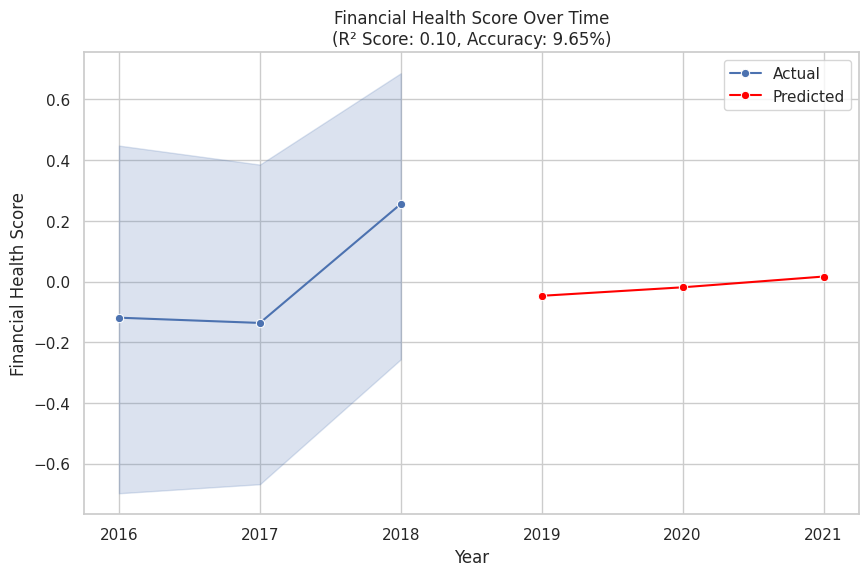

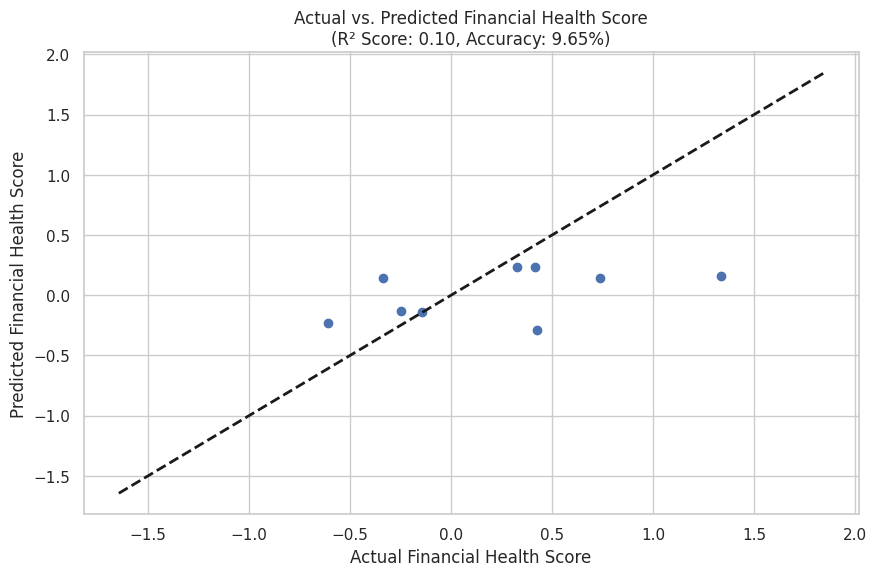

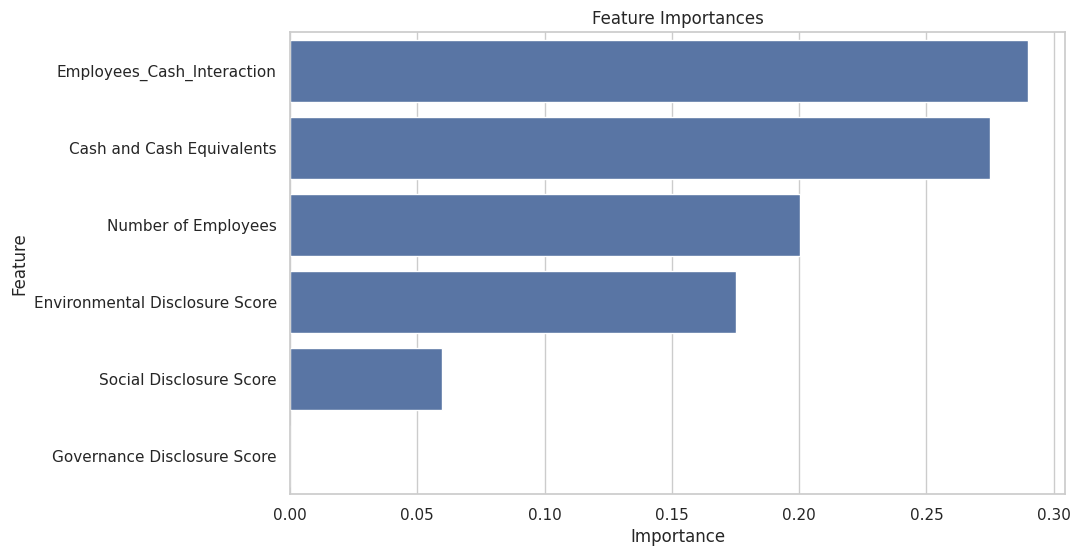

In [73]:
#Creating a composite financial health score
#Normalizing the financial metrics
industry_data['ROA_normalized'] = (industry_data['Return on Assets'] - industry_data['Return on Assets'].mean()) / industry_data['Return on Assets'].std()
industry_data['ROE_normalized'] = (industry_data['Return on Common Equity'] - industry_data['Return on Common Equity'].mean()) / industry_data['Return on Common Equity'].std()
industry_data['GrossMargin_normalized'] = (industry_data['Gross Margin'] - industry_data['Gross Margin'].mean()) / industry_data['Gross Margin'].std()

#Composite financial health score (simple average of normalized metrics)
industry_data['Financial_Health_Score'] = industry_data[['ROA_normalized', 'ROE_normalized', 'GrossMargin_normalized']].mean(axis=1)

#Creating interaction features
industry_data['Employees_Cash_Interaction'] = industry_data['Number of Employees'] * industry_data['Cash and Cash Equivalents']

#Selected features
selected_features = ['Number of Employees', 'Governance Disclosure Score',
                     'Social Disclosure Score', 'Cash and Cash Equivalents',
                     'Environmental Disclosure Score', 'Employees_Cash_Interaction']

#Features and target
X = industry_data[selected_features]
y = industry_data['Financial_Health_Score']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

#Making predictions on the test set
y_pred = best_rf_model.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Calculating the accuracy
accuracy = best_rf_model.score(X_test, y_test) * 100

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}%')

#Making predictions for future years
future_years = pd.DataFrame({
    'Number of Employees': np.linspace(industry_data['Number of Employees'].mean(), industry_data['Number of Employees'].mean() * 1.1, 3),
    'Governance Disclosure Score': np.linspace(industry_data['Governance Disclosure Score'].mean(), industry_data['Governance Disclosure Score'].mean() * 1.1, 3),
    'Social Disclosure Score': np.linspace(industry_data['Social Disclosure Score'].mean(), industry_data['Social Disclosure Score'].mean() * 1.1, 3),
    'Cash and Cash Equivalents': np.linspace(industry_data['Cash and Cash Equivalents'].mean(), industry_data['Cash and Cash Equivalents'].mean() * 1.1, 3),
    'Environmental Disclosure Score': np.linspace(industry_data['Environmental Disclosure Score'].mean(), industry_data['Environmental Disclosure Score'].mean() * 1.1, 3),
    'Employees_Cash_Interaction': np.linspace(industry_data['Employees_Cash_Interaction'].mean(), industry_data['Employees_Cash_Interaction'].mean() * 1.1, 3)
}, index=pd.date_range(start='2019', periods=3, freq='Y'))

future_predictions = best_rf_model.predict(future_years)

#Combining the future years with predictions
future_df = future_years.copy()
future_df['Year'] = future_df.index.year
future_df['Financial_Health_Score'] = future_predictions

#Combining the actual and predicted values for visualization
combined_df = pd.concat([industry_data[['Year', 'Financial_Health_Score']], future_df[['Year', 'Financial_Health_Score']]], ignore_index=True)

#The actual and predicted values over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df[combined_df['Year'] <= 2018], x='Year', y='Financial_Health_Score', marker='o', label='Actual')
sns.lineplot(data=combined_df[combined_df['Year'] > 2018], x='Year', y='Financial_Health_Score', marker='o', color='red', label='Predicted')
plt.title('Financial Health Score Over Time\n(R² Score: {:.2f}, Accuracy: {:.2f}%)'.format(r2, accuracy))
plt.xlabel('Year')
plt.ylabel('Financial Health Score')
plt.legend()
plt.show()

#Scatter plot of actual vs. predicted financial health scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Financial Health Score')
plt.ylabel('Predicted Financial Health Score')
plt.title('Actual vs. Predicted Financial Health Score\n(R² Score: {:.2f}, Accuracy: {:.2f}%)'.format(r2, accuracy))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

#Feature Importance Plot
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.show()